# **TATA STEELS(1996-2017) STOCK ANALYSIS**








In [1]:
pip install SciencePlots


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pmdarima 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(['science','notebook','grid'])

In [4]:
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [6]:
import yfinance as yf
data = yf.Ticker('TATASTEEL.NS')
df = yf.download("TATASTEEL.NS", start="1996-01-01", end="2022-11-18")
print(df.columns)
print(df.shape)
print(df.info())

# since date is already a index and datatype date 
#parse_dates=True and index_col = 0 is not needed


[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(6762, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6762 entries, 1996-01-01 to 2022-11-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6762 non-null   float64
 1   High       6762 non-null   float64
 2   Low        6762 non-null   float64
 3   Close      6762 non-null   float64
 4   Adj Close  6762 non-null   float64
 5   Volume     6762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 369.8 KB
None


In [7]:
# columns are 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
# volume = is no of share transactions over period of time
#   here eg in 1996-01-01 10242229 no of shares bought by the buyer 
# some investors compare avg volume(20 or 30 days) to todays volume
# some investors use contract analyse future daily volume
#  some investors check whether their active volume over range of days
# and some do limit their options when it has active volume as stock price is less so many bought

# **Pre-Processing**
---  --- ---  --- ---  ---  ---  --- ---  --- ---  --- ---  ---
*  **DETECTING NULL VALUES**         -> NOTHING

*   **FORWARD FILLING SAT AND SUN**         ->SAME AS EACH WEEK FRIDAY

*   **DIMENSIONALITY REDUCTION**          ->DROPPED OPEN,HIGH,ADJCLOSE
*   **SEASONALY DECOMPOSE**              ->TREND IS THERE







In [8]:
print(df.isna().sum())
print(df.isnull().sum())


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
x = pd.date_range('1996-Jan-06', freq='7D',periods=4*13*27-2)
y = pd.date_range('1996-Jan-07', freq='7D',periods=4*13*27-2)
pending_dates = x.append(y)
pending_dates = sorted(pending_dates)
df22 = pd.DataFrame(index=pending_dates,columns=df.columns)

df['Volume'] = df['Volume'].astype(int).astype(float)

print(df22.info())
frames = [df,df22]
dxx = pd.concat(frames) 
print(dxx.info())
dxx=dxx.sort_index()
g = dxx.copy()
print(g)
dxx.interpolate(method='ffill',inplace=True)




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2804 entries, 1996-01-06 to 2022-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       0 non-null      object
 1   High       0 non-null      object
 2   Low        0 non-null      object
 3   Close      0 non-null      object
 4   Adj Close  0 non-null      object
 5   Volume     0 non-null      object
dtypes: object(6)
memory usage: 153.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9566 entries, 1996-01-01 to 2022-11-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6762 non-null   float64
 1   High       6762 non-null   float64
 2   Low        6762 non-null   float64
 3   Close      6762 non-null   float64
 4   Adj Close  6762 non-null   float64
 5   Volume     6762 non-null   float64
dtypes: float64(6)
memory usage: 523.1 KB
None
                  Open    

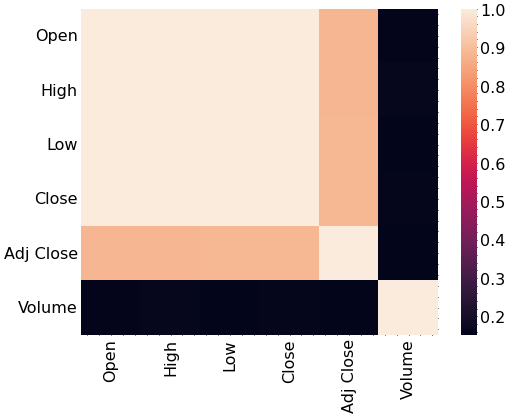

In [10]:
#setting source and target variable

# source = date
# target = High


u = dxx.corr()
sns.heatmap(u)

target = dxx[['High']]
target.index.name = "date"


**correlation between [close ,open,high,low,close,adj] close are same so we reduce any 3 feautres from that so remove columns of [open,high,low,close]**

In [11]:
dxx.head(26)

Open       High        Low      Close  Adj Close      Volume
date                                                                         
1996-01-01  11.172855  11.214964  11.035300  11.186892   2.568284  10242229.0
1996-01-02  11.172855  11.214964  10.951082  10.979155   2.520592  16954313.0
1996-01-03  10.979155  11.229000  10.951082  10.981962   2.521237  13514114.0
1996-01-04  10.807913  10.807913  10.386825  10.633863   2.441321  34785820.0
1996-01-05  10.504730  10.555260  10.316644  10.423319   2.392983  30138033.0
1996-01-06  10.504730  10.555260  10.316644  10.423319   2.392983  30138033.0
1996-01-07  10.504730  10.555260  10.316644  10.423319   2.392983  30138033.0
1996-01-08  10.358753  10.386825   9.943280  10.033112   2.303399  36752157.0
1996-01-09   9.825375  10.069606   9.825375   9.985388   2.292444  36964108.0
1996-01-10   9.985388  10.176281   9.825375   9.932051   2.280198  35923053.0
1996-01-11   9.937665  10.215583   9.903978  10.165052   2.333690  27719296.0
1996-01-12  10.165052  10.325066  10.063991  10.125751   2.324668  31593194.0
1996-01-13  10.165052  10.325066  10.063991  10.125751   2.324668  31593194.0
1996-01-14  10.165052  10.325066  10.063991  10.125751   2.324668  31593194.0
1996-01-15  10.063991  10.181896  10.019075  10.041533   2.305333  13352034.0
1996-01-16  10.041533  10.106100   9.943280  10.021883   2.300822  19465667.0
1996-01-17   9.937665  10.010654   9.628868   9.682205   2.222838  25512510.0
1996-01-18   9.547457   9.614831   9.320070   9.477276   2.175791  31930712.0
1996-01-19   9.362179   9.510963   9.320070   9.395866   2.157101  20078367.0
1996-01-20   9.362179   9.510963   9.320070   9.395866   2.157101  20078367.0
1996-01-21   9.362179   9.510963   9.320070   9.395866   2.157101  20078367.0
1996-01-22   9.488505   9.581144   9.390251   9.494120   2.179658  15288982.0
1996-01-23   9.418324   9.533421   8.983200   9.117948   2.093296  16752158.0
1996-01-24   9.117948  10.325066   8.842838   8.994429   2.064939  20708877.0
1996-01-25   8.983200   9.014080   8.744584   8.800729   2.020469  15920383.0
1996-01-26   8.800729   8.800729   8.800729   8.800729   2.020469         0.0

In [12]:
dxx.head(7)

Open       High        Low      Close  Adj Close      Volume
date                                                                         
1996-01-01  11.172855  11.214964  11.035300  11.186892   2.568284  10242229.0
1996-01-02  11.172855  11.214964  10.951082  10.979155   2.520592  16954313.0
1996-01-03  10.979155  11.229000  10.951082  10.981962   2.521237  13514114.0
1996-01-04  10.807913  10.807913  10.386825  10.633863   2.441321  34785820.0
1996-01-05  10.504730  10.555260  10.316644  10.423319   2.392983  30138033.0
1996-01-06  10.504730  10.555260  10.316644  10.423319   2.392983  30138033.0
1996-01-07  10.504730  10.555260  10.316644  10.423319   2.392983  30138033.0

In [13]:
dxx["Volume"].describe()

count    9.566000e+03
mean     7.098268e+07
std      5.967787e+07
min      0.000000e+00
25%      3.326248e+07
50%      5.496022e+07
75%      8.909913e+07
max      6.428460e+08
Name: Volume, dtype: float64

seasonal_decompose shows us that trend is there

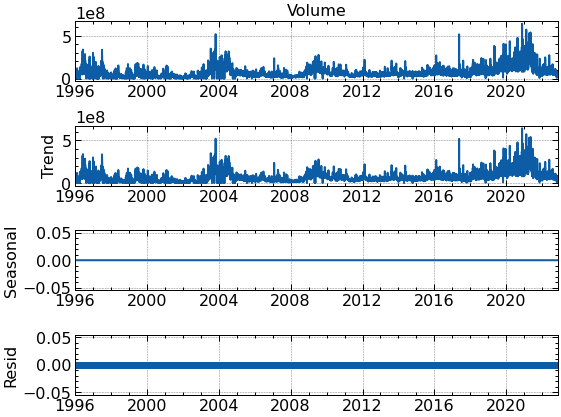

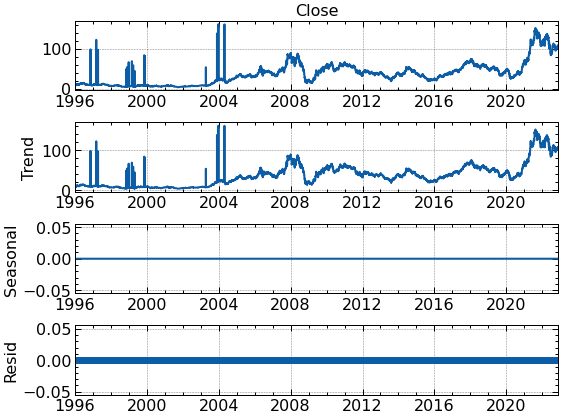

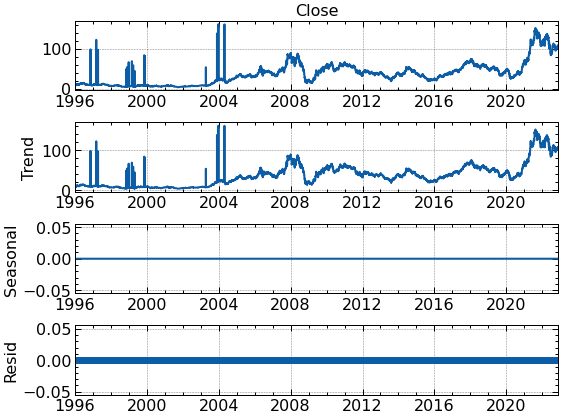

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
m=seasonal_decompose(dxx['Volume'],period=1)
m.plot()
plt.show()
mx=seasonal_decompose(dxx['Close'],period=1)
mx.plot()

# **2)PREPROCESSING ANALYSIS**


*   plotting ['Open','High','Low','Close','Adj Close']

*    MOVING AVG PREDICTIONS
*   Analysis of 2000-2003


*  pre vs post covid


*   Month Wise Analysis
*   Week Wise Analysis







###2.1) Open,High,Low,Close,Adj Close Plot

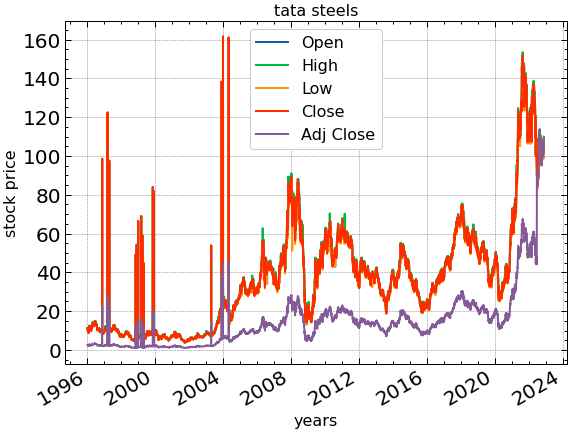

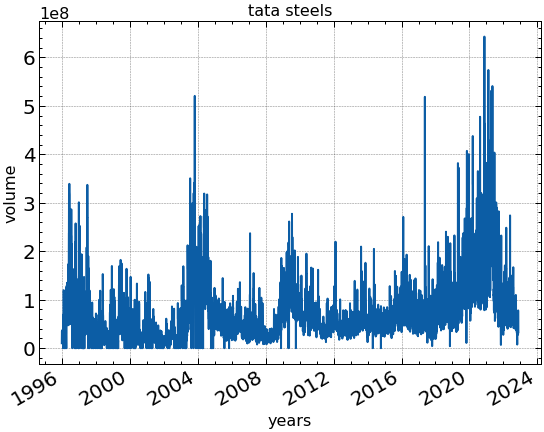

In [15]:
dxx[['Open','High','Low','Close','Adj Close']].plot(figsize=(9,7),linewidth=2,fontsize=20,title="tata steels",ylabel="stock price",xlabel="years")
plt.show()
dxx.Volume.plot(figsize=(9,7),linewidth=2,fontsize=20,title="tata steels",ylabel="volume",xlabel="years");


In [16]:
print(dxx.tail())

                  Open        High         Low       Close   Adj Close  \
date                                                                     
2022-11-13  106.250000  108.199997  106.250000  107.550003  107.550003   
2022-11-14  108.500000  110.000000  108.250000  108.699997  108.699997   
2022-11-15  109.000000  109.349998  107.199997  108.550003  108.550003   
2022-11-16  108.449997  108.800003  105.199997  106.550003  106.550003   
2022-11-17  105.900002  106.800003  104.500000  105.849998  105.849998   

                Volume  
date                    
2022-11-13  77933417.0  
2022-11-14  55474425.0  
2022-11-15  35007427.0  
2022-11-16  40404167.0  
2022-11-17  32894825.0  


finding for which we can use moving avg


1.   mean of yearwise
2.   mean may have outlier so using std yearwise
3.   result std of year [2000,2001,2002] has std of [1.006479,1.515072,0.795810]
4.   in future find year of outliers more so selling happens
5.    and try with median




In [17]:
yearwise = dxx.Close.groupby(dxx.index.year).describe()
yearwise

count        mean        std        min         25%         50%  \
date                                                                    
1996  366.0   11.298506   4.872297   8.312267    9.630973   10.699834   
1997  365.0   11.200449  11.195559   6.630724    9.508156   10.232426   
1998  365.0    7.408104   6.492752   3.930150    5.308510    6.903028   
1999  365.0    8.145713   7.324406   4.252984    6.484747    7.764854   
2000  366.0    6.653236   1.006479   4.887422    5.976635    6.470711   
2001  365.0    6.198216   1.515072   3.775751    4.873386    6.265782   
2002  365.0    6.657143   0.795810   4.822855    5.962599    6.658797   
2003  365.0   13.180882  11.568558   7.144451    8.348762    9.676591   
2004  366.0   22.933416   8.033398  14.760521   20.537842   22.806101   
2005  355.0   31.812166   2.350163  27.859150   29.935112   31.177320   
2006  352.0   41.309222   5.674092  29.358221   38.398973   41.851889   
2007  352.0   50.815374  16.793191  30.763811   36.596085   46.382790   
2008  350.0   57.067005  22.928777  14.176721   43.852085   63.014000   
2009  347.0   36.207136  13.482525  14.462542   22.389311   39.676716   
2010  354.0   55.675978   5.966225  43.006531   50.637951   57.469074   
2011  351.0   51.021137   8.890221  31.950024   43.132769   54.625156   
2012  350.0   39.931329   3.135506  31.950024   37.911772   39.233694   
2013  352.0   31.115241   5.712713  18.888002   27.475733   29.792073   
2014  348.0   43.129320   6.288128  32.092934   37.611659   43.554356   
2015  350.0   28.298238   5.649155  19.188114   23.019308   28.379642   
2016  351.0   32.570550   5.398529  20.722021   29.830184   33.240982   
2017  353.0   53.938037   9.638076  37.275822   45.483646   52.167095   
2018  350.0   59.355162   5.815074  49.865002   55.793751   58.007500   
2019  347.0   44.857666   6.370693  32.480000   39.794998   46.845001   
2020  355.0   39.811873   9.968398  25.375000   32.157499   39.384998   
2021  352.0  108.714147  26.163973  60.099998   86.002502  113.209999   
2022  309.0  110.699207  13.454633  83.809998  101.599998  107.809998   

             75%         max  
date                          
1996   12.458576   98.531372  
1997   10.824756  122.339188  
1998    7.922060   66.473312  
1999    8.146640   83.946136  
2000    7.227967   10.232426  
2001    7.481321    9.151635  
2002    7.116379    8.508775  
2003   15.234946  161.486557  
2004   24.794685  160.997437  
2005   33.832277   37.291512  
2006   43.823630   56.514156  
2007   62.085987   89.118988  
2008   76.134378   88.942726  
2009   47.617779   59.264980  
2010   60.560703   66.281891  
2011   58.395609   67.077423  
2012   42.706421   47.174755  
2013   36.330229   42.139542  
2014   49.156445   54.806175  
2015   33.152852   39.700535  
2016   36.994762   41.634590  
2017   64.686050   70.145233  
2018   60.876249   74.646912  
2019   49.964998   55.720001  
2020   44.355000   64.364998  
2021  129.785004  151.940002  
2022  120.959999  137.074997

In [18]:
print(dxx.loc['2000-01','Close'].mean())
dxx.index

8.89463593882899


DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-06', '1996-01-07', '1996-01-08',
               '1996-01-09', '1996-01-10',
               ...
               '2022-11-07', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15',
               '2022-11-16', '2022-11-17'],
              dtype='datetime64[ns]', name='date', length=9566, freq=None)

###**2.2)  Moving Averge**





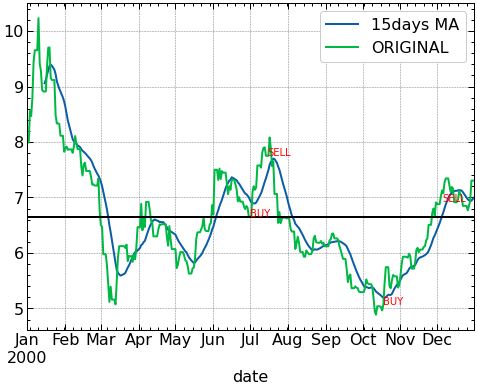

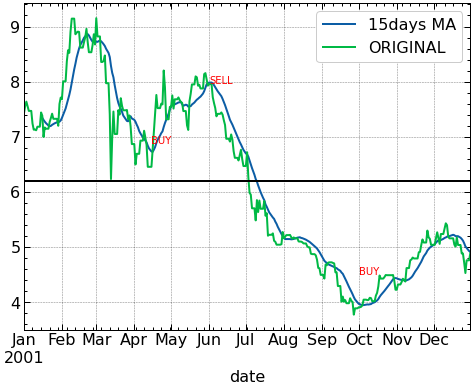

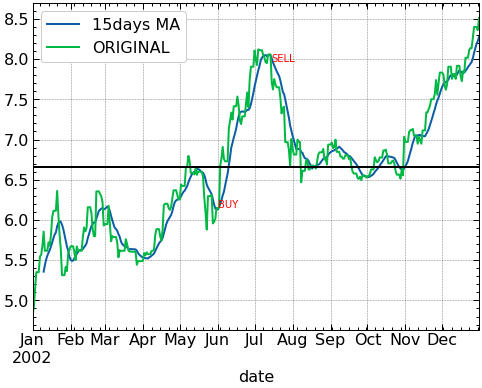

In [19]:
from pandas import Timestamp
k = dxx['Close'].loc[dxx.index.year==2000]
rol_mean3= k.rolling(15).mean()
rol_mean3.plot()
dxx['Close'].loc['2000'].plot()
plt.axhline(dxx['Close'].loc['2000'].mean(),color='black')
plt.legend(['15days MA','ORIGINAL'])
plt.text(Timestamp("2000-07-01"),dxx['Close'].loc[dxx.index=="2000-07-01"], "BUY",fontsize=10,color="red")
plt.text(Timestamp("2000-07-15"),dxx['Close'].loc[dxx.index=="2000-07-15"], "SELL",fontsize=10,color="red")

plt.text(Timestamp("2000-10-18"),dxx['Close'].loc[dxx.index=="2000-10-18"], "BUY",fontsize=10,color="red")
plt.text(Timestamp("2000-12-15"),dxx['Close'].loc[dxx.index=="2000-12-15"], "SELL",fontsize=10,color="red",ha="center")

plt.show()


k1 = dxx['Close'].loc[dxx.index.year==2001]
rol_mean4= k1.rolling(15).mean()
rol_mean4.plot()
dxx['Close'].loc['2001'].plot()
plt.axhline(dxx['Close'].loc['2001'].mean(),color='black')
plt.legend(['15days MA','ORIGINAL'])
plt.text(Timestamp("2001-04-15"),dxx['Close'].loc[dxx.index=="2001-04-01"], "BUY",fontsize=10,color="red")
plt.text(Timestamp("2001-06-01"),dxx['Close'].loc[dxx.index=="2001-06-01"], "SELL",fontsize=10,color="red")
plt.text(Timestamp("2001-10-1"),dxx['Close'].loc[dxx.index=="2001-9-01"], "BUY",fontsize=10,color="red")

plt.show()


k2 = dxx['Close'].loc[dxx.index.year==2002]
rol_mean5= k2.rolling(10).mean()
rol_mean5.plot()
dxx['Close'].loc['2002'].plot()
plt.axhline(dxx['Close'].loc['2002'].mean(),color='black')
plt.legend(['15days MA','ORIGINAL'])
plt.text(Timestamp("2002-06-01"),dxx['Close'].loc[dxx.index=="2002-06-01"], "BUY",fontsize=10,color="red")
plt.text(Timestamp("2002-07-15"),dxx['Close'].loc[dxx.index=="2002-07-10"], "SELL",fontsize=10,color="red")
plt.show()

# YOU CAN 15 DAYS PRIOR WHETHER THE GRAPH GOES DOWN OR UP 

####**2.2.1)Estimation**

In [20]:
#estimated cost of buying 100 shares of tata from 2000-10-18 and sell it on 2000-12-15
def estimated_cost(a,b):
  money_investing = int(input("Enter the Money You need to Invest"))
  no_of_shares = money_investing // a
  if a>b:
    print("Loss")
  else:
    print("No of Shares",no_of_shares)
    print("Profit is {}".format(money_investing+(b-a)*no_of_shares))
    return (money_investing+(b-a)*no_of_shares)

print(estimated_cost(dxx['Close'].loc['2000-10-18'],dxx['Close'].loc['2000-12-15']))


Enter the Money You need to Invest1222
No of Shares 241.0
Profit is 1666.4917640686035
1666.4917640686035


In [21]:
yearwise

count        mean        std        min         25%         50%  \
date                                                                    
1996  366.0   11.298506   4.872297   8.312267    9.630973   10.699834   
1997  365.0   11.200449  11.195559   6.630724    9.508156   10.232426   
1998  365.0    7.408104   6.492752   3.930150    5.308510    6.903028   
1999  365.0    8.145713   7.324406   4.252984    6.484747    7.764854   
2000  366.0    6.653236   1.006479   4.887422    5.976635    6.470711   
2001  365.0    6.198216   1.515072   3.775751    4.873386    6.265782   
2002  365.0    6.657143   0.795810   4.822855    5.962599    6.658797   
2003  365.0   13.180882  11.568558   7.144451    8.348762    9.676591   
2004  366.0   22.933416   8.033398  14.760521   20.537842   22.806101   
2005  355.0   31.812166   2.350163  27.859150   29.935112   31.177320   
2006  352.0   41.309222   5.674092  29.358221   38.398973   41.851889   
2007  352.0   50.815374  16.793191  30.763811   36.596085   46.382790   
2008  350.0   57.067005  22.928777  14.176721   43.852085   63.014000   
2009  347.0   36.207136  13.482525  14.462542   22.389311   39.676716   
2010  354.0   55.675978   5.966225  43.006531   50.637951   57.469074   
2011  351.0   51.021137   8.890221  31.950024   43.132769   54.625156   
2012  350.0   39.931329   3.135506  31.950024   37.911772   39.233694   
2013  352.0   31.115241   5.712713  18.888002   27.475733   29.792073   
2014  348.0   43.129320   6.288128  32.092934   37.611659   43.554356   
2015  350.0   28.298238   5.649155  19.188114   23.019308   28.379642   
2016  351.0   32.570550   5.398529  20.722021   29.830184   33.240982   
2017  353.0   53.938037   9.638076  37.275822   45.483646   52.167095   
2018  350.0   59.355162   5.815074  49.865002   55.793751   58.007500   
2019  347.0   44.857666   6.370693  32.480000   39.794998   46.845001   
2020  355.0   39.811873   9.968398  25.375000   32.157499   39.384998   
2021  352.0  108.714147  26.163973  60.099998   86.002502  113.209999   
2022  309.0  110.699207  13.454633  83.809998  101.599998  107.809998   

             75%         max  
date                          
1996   12.458576   98.531372  
1997   10.824756  122.339188  
1998    7.922060   66.473312  
1999    8.146640   83.946136  
2000    7.227967   10.232426  
2001    7.481321    9.151635  
2002    7.116379    8.508775  
2003   15.234946  161.486557  
2004   24.794685  160.997437  
2005   33.832277   37.291512  
2006   43.823630   56.514156  
2007   62.085987   89.118988  
2008   76.134378   88.942726  
2009   47.617779   59.264980  
2010   60.560703   66.281891  
2011   58.395609   67.077423  
2012   42.706421   47.174755  
2013   36.330229   42.139542  
2014   49.156445   54.806175  
2015   33.152852   39.700535  
2016   36.994762   41.634590  
2017   64.686050   70.145233  
2018   60.876249   74.646912  
2019   49.964998   55.720001  
2020   44.355000   64.364998  
2021  129.785004  151.940002  
2022  120.959999  137.074997

## 2.3) Exponential Smoothing Average

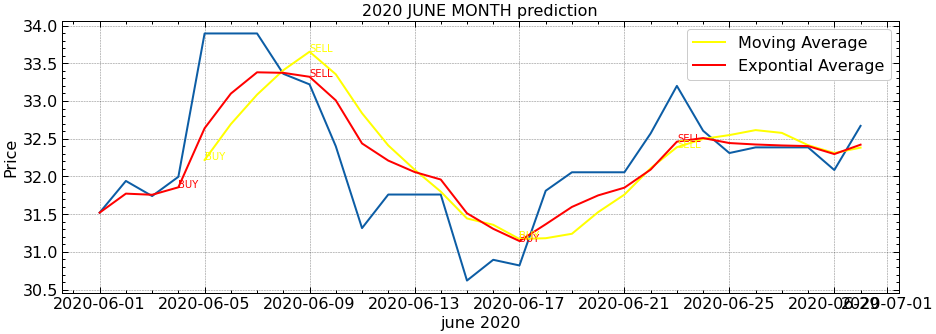

In [22]:
plt.figure(figsize=(15,5))
plt.plot(dxx['Close'].loc["2020-06-01":"2020-06-30"])
plt.plot(dxx['Close'].loc["2020-06-01":"2020-06-30"].rolling(5).mean(),color="yellow",label="Moving Average")
plt.plot(dxx['Close'].loc["2020-06-01":"2020-06-30"].ewm(span=5).mean(),color="red",label="Expontial Average")
do = dxx['Close'].loc["2020-06-01":"2020-06-30"].ewm(span=5).mean()
ro = dxx['Close'].loc["2020-06-01":"2020-06-30"].rolling(5).mean()
ro2 = pd.DataFrame(ro)
do2 = pd.DataFrame(do)
plt.text(Timestamp('2020-06-04'),do2['Close'].loc['2020-06-04'],"BUY",color="red")
plt.text(Timestamp('2020-06-09'),do2['Close'].loc['2020-06-09'],"SELL",color="red")
plt.text(Timestamp('2020-06-17'),do2['Close'].loc['2020-06-17'],"BUY",color="red")
plt.text(Timestamp('2020-06-23'),do2['Close'].loc['2020-06-23'],"SELL",color="red")


plt.text(Timestamp('2020-06-05'),ro2['Close'].loc['2020-06-05'],"BUY",color="yellow")
plt.text(Timestamp('2020-06-09'),ro2['Close'].loc['2020-06-09'],"SELL",color="yellow")
plt.text(Timestamp('2020-06-17'),ro2['Close'].loc['2020-06-17'],"BUY",color="yellow")
plt.text(Timestamp('2020-06-23'),ro2['Close'].loc['2020-06-23'],"SELL",color="yellow")
plt.title("2020 JUNE MONTH prediction")
plt.ylabel("Price")
plt.xlabel("june 2020")
plt.legend()
# expontential smoothing average method smoothens the data very well compared to Moving averga as Moving Average we need to take all past 
#records of n with equal weights but in  expontential smoothing we give more weight to the recent values


# inference ewm tuning alpha=0.9 fits the data well

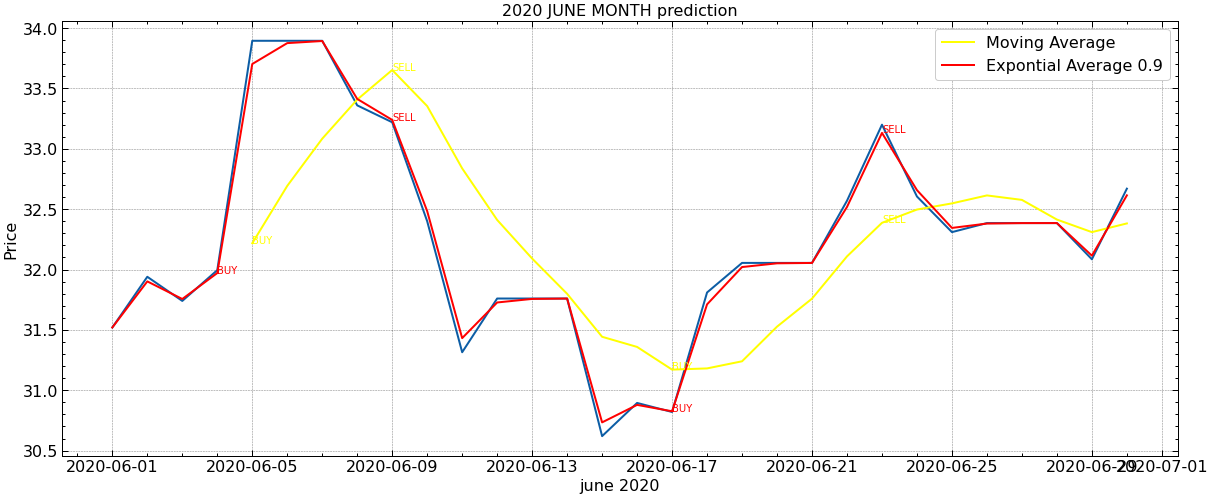

In [23]:
plt.figure(figsize=(20,8))
plt.plot(dxx['Close'].loc["2020-06-01":"2020-06-30"])
plt.plot(dxx['Close'].loc["2020-06-01":"2020-06-30"].rolling(5).mean(),color="yellow",label="Moving Average")
plt.plot(dxx['Close'].loc["2020-06-01":"2020-06-30"].ewm(alpha=0.9).mean(),color="red",label="Expontial Average 0.9")

do = dxx['Close'].loc["2020-06-01":"2020-06-30"].ewm(alpha=0.9).mean()
ro = dxx['Close'].loc["2020-06-01":"2020-06-30"].rolling(5).mean()
ro2 = pd.DataFrame(ro)
do2 = pd.DataFrame(do)
plt.text(Timestamp('2020-06-04'),do2['Close'].loc['2020-06-04'],"BUY",color="red")
plt.text(Timestamp('2020-06-09'),do2['Close'].loc['2020-06-09'],"SELL",color="red")
plt.text(Timestamp('2020-06-17'),do2['Close'].loc['2020-06-17'],"BUY",color="red")
plt.text(Timestamp('2020-06-23'),do2['Close'].loc['2020-06-23'],"SELL",color="red")


plt.text(Timestamp('2020-06-05'),ro2['Close'].loc['2020-06-05'],"BUY",color="yellow")
plt.text(Timestamp('2020-06-09'),ro2['Close'].loc['2020-06-09'],"SELL",color="yellow")
plt.text(Timestamp('2020-06-17'),ro2['Close'].loc['2020-06-17'],"BUY",color="yellow")
plt.text(Timestamp('2020-06-23'),ro2['Close'].loc['2020-06-23'],"SELL",color="yellow")
plt.title("2020 JUNE MONTH prediction")
plt.ylabel("Price")
plt.xlabel("june 2020")
plt.legend()
# expontential smoothing average method smoothens the data very well compared to Moving averga as Moving Average we need to take all past 
#records of n with equal weights but in  expontential smoothing we give more weight to the recent values


####2.3.1) comparing profit on moving average and Exponential Average

In [24]:
x1=0
#rolling mean Profit
x1+=estimated_cost(ro2['Close'].loc['2020-06-05'],ro2['Close'].loc['2020-06-09'])
x1+=estimated_cost(ro2['Close'].loc['2020-06-17'],ro2['Close'].loc['2020-06-23'])

#expontential  avg Profit
x2 = 0
x2+=estimated_cost(do2['Close'].loc['2020-06-04'],do2['Close'].loc['2020-06-09'])
x2+=estimated_cost(do2['Close'].loc['2020-06-17'],do2['Close'].loc['2020-06-23'])

print(x1,x2)

Enter the Money You need to Invest223
No of Shares 6.0
Profit is 231.610001373291
Enter the Money You need to Invest223
No of Shares 7.0
Profit is 231.5119998931885
Enter the Money You need to Invest222
No of Shares 6.0
Profit is 229.60923640889874
Enter the Money You need to Invest222
No of Shares 7.0
Profit is 238.14170447327774
463.1220012664795 467.75094088217645


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


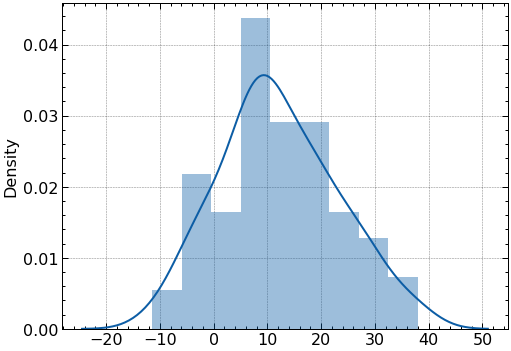

In [25]:
from scipy.stats import norm 
import seaborn as sns
year_2001 = norm.rvs(loc=dxx['Close'].loc['2001':'2004'].mean(),scale=dxx['Close'].loc['2001':'2004'].std(),size=100)
sns.distplot(year_2001)


ref:https://www.tatasteel.com/investors/annual-report-2010-11/html/pdfs/financial-statistics.pdf

##**2.4) 2000-2003 year analysis**

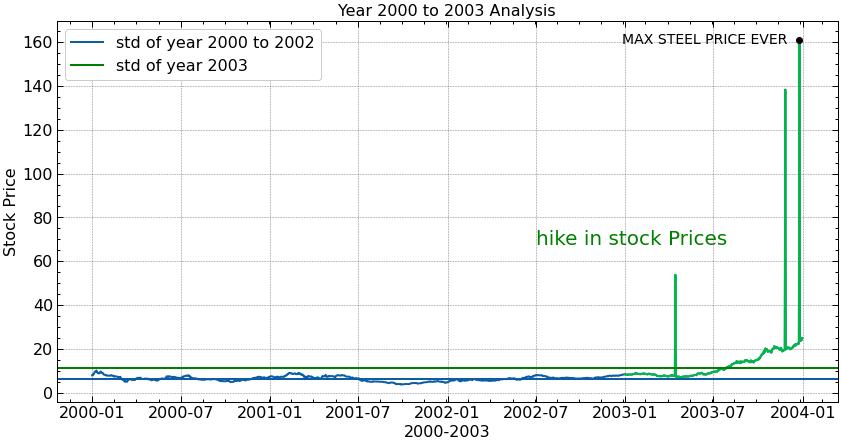

Text(0.5, 0, '2000-2003')

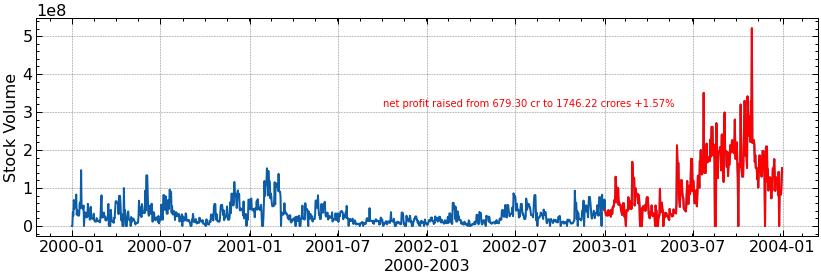

In [26]:
# after 2000,2001,2002 there is sudden -hike in 2003

#net profit of tata
# 2000-01 553.44 crores
# 2001-02 204.90 crores
# 2002-03 679.30 crores
# 2003-04  1746.22 crores


plt.figure(figsize=(14,7))
plt.plot(dxx['Close'].loc['2000':'2003'])
plt.plot(dxx['Close'].loc['2003'])
plt.axhline(dxx['Close'].loc['2000':'2003'].std(),label="std of year 2000 to 2002")
plt.axhline(dxx['Close'].loc['2003'].std(),color='g',label="std of year 2003")
plt.plot(Timestamp("2003-12-25"),161,color="Black",marker='o')
plt.text(Timestamp("2002-12-25"),161,"MAX STEEL PRICE EVER",va="center",fontsize=14,color="black")
plt.text(Timestamp("2002-07-01"),70.0,"hike in stock Prices",va="center",fontsize=20,color="green")

plt.xlabel("2000-2003")
plt.ylabel("Stock Price")
plt.title("Year 2000 to 2003 Analysis")
plt.legend()
plt.show()
plt.figure(figsize=(14,4))
plt.plot(dxx['Volume'].loc['2000':'2003'])
plt.plot(dxx['Volume'].loc['2003'],color="red")
plt.text(Timestamp("2001-10-01"),320462659.0,"net profit raised from 679.30 cr to 1746.22 crores +1.57%",va="center",fontsize=10,color="red")
plt.ylabel("Stock Volume")
plt.xlabel("2000-2003")

In [27]:
dxx['Volume'].loc['2003'].max()

520462659.0

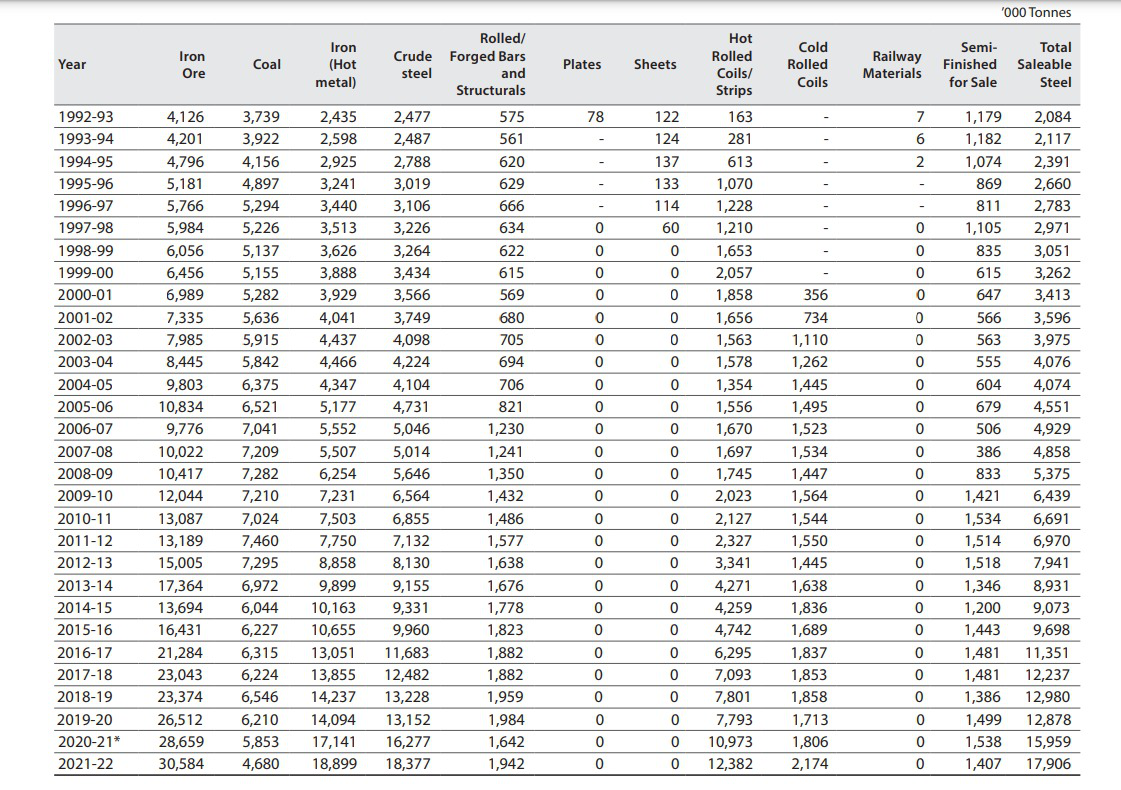

In [28]:
from PIL import Image 
image =  Image.open("tata_steel_annual_production.jpeg")
image
# iron ore is used mostly in makng steels

##**2.5)PRE-COVID VS POST COVID**

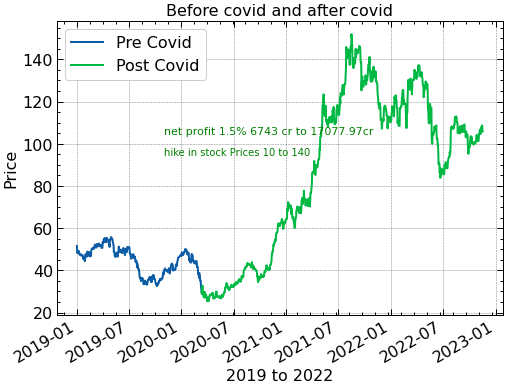

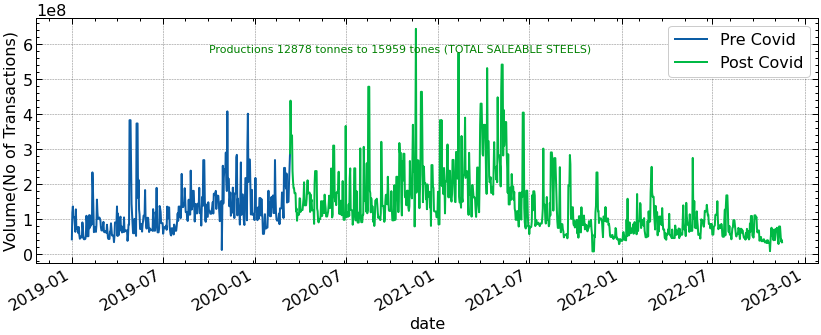

In [29]:
#2019-2020 6743.80 crore
#2020-2021 17077.97 crore
#2021-2022 33011.18 crore

dxx['Close'].loc['2019':'2020-03-11'].plot(label="Pre Covid")
dxx['Close'].loc['2020-03-11':].plot(label="Post Covid")
plt.title("Before covid and after covid")
plt.ylabel("Price")
plt.xlabel("2019 to 2022")
plt.text(Timestamp("2019-11-1"),106.0,"net profit 1.5% 6743 cr to 17077.97cr",va="center",fontsize=11,color="green")

plt.text(Timestamp("2019-11-1"),96.0,"hike in stock Prices 10 to 140",va="center",fontsize=10,color="green")
plt.legend()
plt.show()
plt.figure(figsize=(14,5))
dxx['Volume'].loc['2019':'2020-03-11'].plot(label="Pre Covid")
dxx['Volume'].loc['2020-03-11':].plot(label="Post Covid")
plt.ylabel("Volume(No of Transactions)")
plt.text(Timestamp("2019-10-1"),585558589,"Productions 12878 tonnes to 15959 tones (TOTAL SALEABLE STEELS)",va="center",fontsize=11,color="green")

plt.legend()


In [30]:
month_wise  = dxx.groupby(dxx.index.month).mean()
month_wise

Open       High        Low      Close  Adj Close        Volume
date                                                                     
1     36.098749  36.632428  35.337899  35.915849  13.099692  6.551838e+07
2     35.534079  36.221195  34.903983  35.566708  12.953119  7.592323e+07
3     35.525842  36.149879  34.878269  35.500696  12.862438  6.845458e+07
4     36.941348  37.636366  36.333620  36.998870  13.445028  6.633977e+07
5     37.253035  37.900296  36.430566  37.119425  13.538612  7.861087e+07
6     36.782466  37.407805  36.098014  36.709017  14.329412  7.704621e+07
7     36.845177  37.478365  36.167761  36.826486  15.533142  7.671336e+07
8     37.545596  38.125833  36.842973  37.429929  16.092846  7.611652e+07
9     37.930179  38.498365  37.260673  37.824130  16.365828  6.613760e+07
10    37.363108  37.994489  36.627699  37.263058  15.968728  6.939324e+07
11    37.331492  37.886478  36.604907  37.222720  14.946945  7.002588e+07
12    36.344246  36.895568  35.824213  36.363699  13.269463  6.094437e+07

##**2.6) weekwise Analysis**

Text(4.3, 36.2, 'Friday price drops')

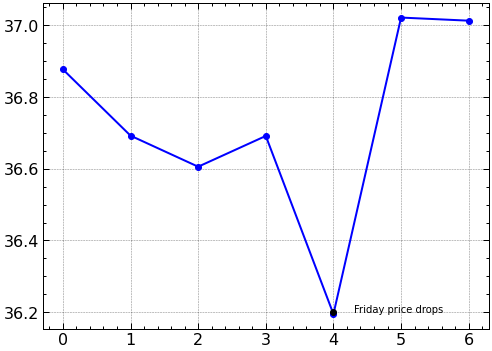

In [31]:
week_wise  = dxx.groupby(dxx.index.dayofweek).mean()
plt.plot(week_wise['Close'],marker="o",color="blue")
plt.plot(4,36.2,marker="o",color="black")
plt.text(4.3,36.2,"Friday price drops")

##2.7)Month Wise Analysis

Text(0, 0.5, 'STock Price')

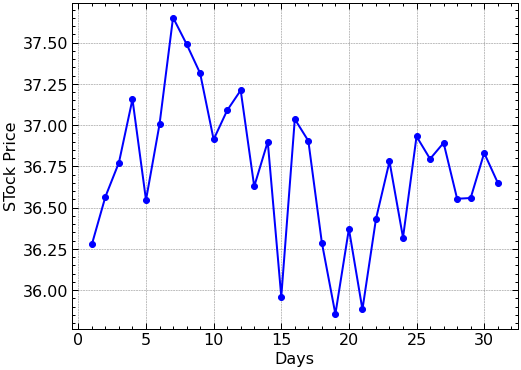

In [32]:
day_wise  = dxx.groupby(dxx.index.day).mean()
plt.plot(day_wise['Close'],marker="o",color="blue")
plt.xlabel("Days")
plt.ylabel("STock Price")

Text(0, 0.5, 'Stock Price')

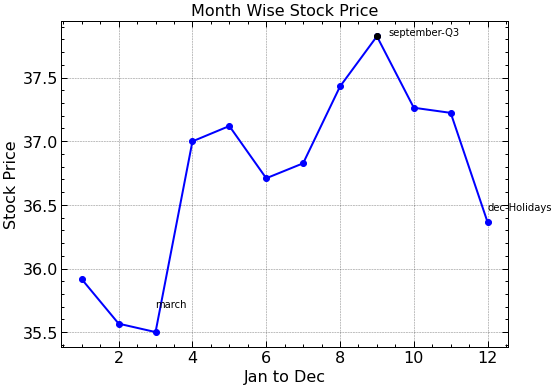

In [33]:
Month_wise  = dxx.groupby(dxx.index.month).mean()
plt.plot(Month_wise['Close'],marker="o",color="blue")
plt.plot(9,37.83,marker="o",color="black")
plt.text(9.3,37.83,"september-Q3")
plt.text(3,35.7,"march")
plt.text(12,36.455,"dec-Holidays")
plt.title("Month Wise Stock Price")
plt.xlabel("Jan to Dec")
plt.ylabel("Stock Price")

In [34]:
X_day=dxx.resample('D').mean()
X_week=dxx.resample('w').mean()
X_month=dxx.resample('M').mean()
X_year=dxx.resample('Y').mean()
X_quarter=dxx.resample('Q').mean()


X_day['year'] = X_day.index.year
X_day['month'] = X_day.index.month
X_day['dayname'] = X_day.index.day 
X_day['weekday'] = X_day.index.dayofweek

X_month['year'] = X_month.index.year
X_month['month'] = X_month.index.month
X_month['day'] = X_month.index.day
X_month['dayofweek'] = X_month.index.dayofweek



In [35]:
X_day['MonthNum']=[d.month for d in X_day.index]
X_day['Month']=[d.strftime('%b') for d in X_day.index]
X_day['Day']=[d.day for d in X_day.index]

years=X_day['year'].unique()
months=X_day['Month'].unique()
month_num=X_day['MonthNum'].unique()
days=X_day['Day'].unique()


### 2.8)NO trends/exist on MONTHS

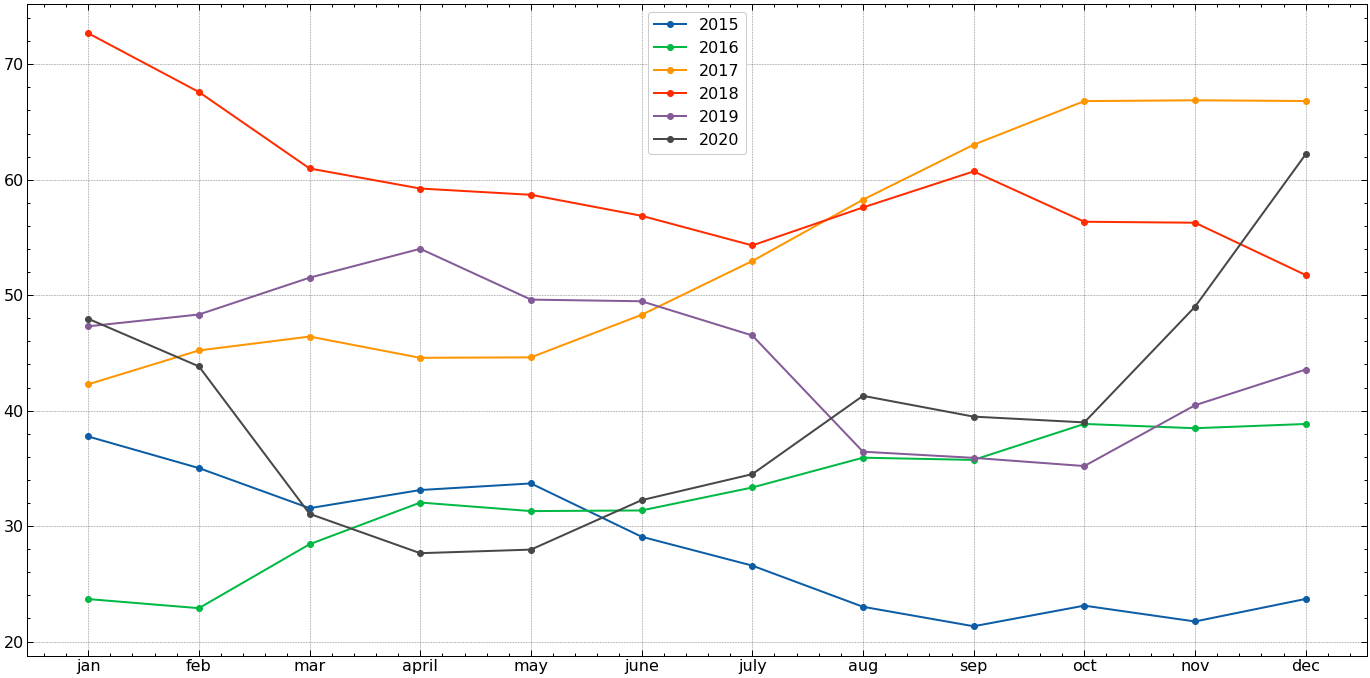

In [36]:
index = ['jan','feb','mar','april','may','june','july','aug','sep','oct','nov','dec']
plt.figure(figsize=(24,12))
plt.plot(index,X_month['Close'].loc[X_month.year==2015],marker='o',label="2015")
plt.plot(index,X_month['Close'].loc[X_month.year==2016],marker='o',label="2016")
plt.plot(index,X_month['Close'].loc[X_month.year==2017],marker='o',label="2017")
plt.plot(index,X_month['Close'].loc[X_month.year==2018],marker='o',label="2018")
plt.plot(index,X_month['Close'].loc[X_month.year==2019],marker='o',label="2019")
plt.plot(index,X_month['Close'].loc[X_month.year==2020],marker='o',label="2020")
plt.legend()



#### 2.8.1) box-plot(Supporting)

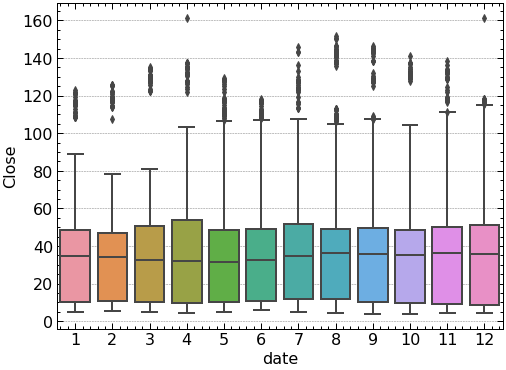

In [37]:
sns.boxplot(data=dxx,x=dxx.index.month,y='Close')

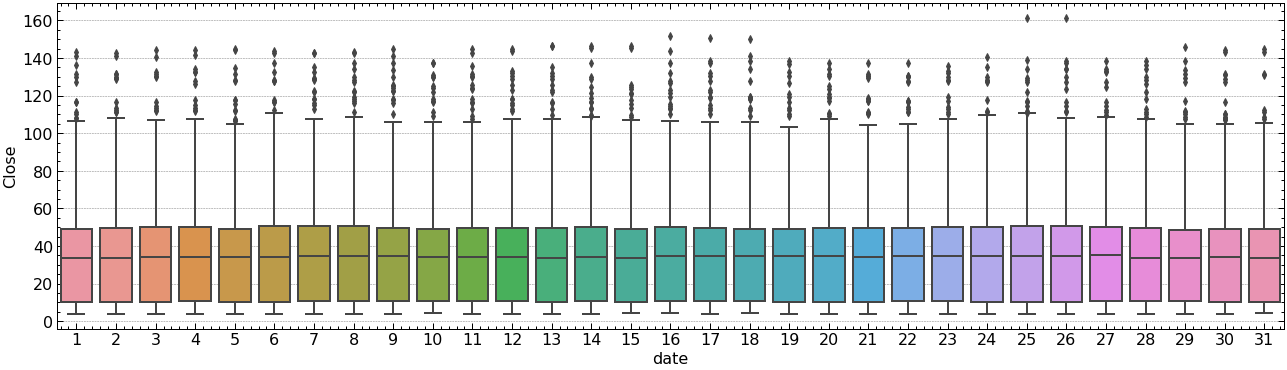

In [38]:
plt.figure(figsize=(22,6))
sns.boxplot(data=dxx,x=dxx.index.day,y='Close')

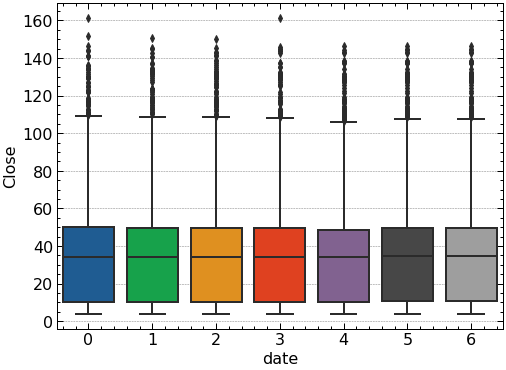

In [39]:
sns.boxplot(data=dxx,x=dxx.index.weekday,y='Close')

# 3) Stock Picking

In [40]:
#avg returns 

price_change = dxx.copy()
price_change.drop(columns = ['Open','High','Low','Adj Close'],inplace = True)
price_change

Close      Volume
date                              
1996-01-01   11.186892  10242229.0
1996-01-02   10.979155  16954313.0
1996-01-03   10.981962  13514114.0
1996-01-04   10.633863  34785820.0
1996-01-05   10.423319  30138033.0
...                ...         ...
2022-11-13  107.550003  77933417.0
2022-11-14  108.699997  55474425.0
2022-11-15  108.550003  35007427.0
2022-11-16  106.550003  40404167.0
2022-11-17  105.849998  32894825.0

[9566 rows x 2 columns]

Close      Volume  1 day change
date                                            
1996-01-01   11.186892  10242229.0           NaN
1996-01-02   10.979155  16954313.0     -0.207737
1996-01-03   10.981962  13514114.0      0.002808
1996-01-04   10.633863  34785820.0     -0.348099
1996-01-05   10.423319  30138033.0     -0.210545
...                ...         ...           ...
2022-11-13  107.550003  77933417.0      0.000000
2022-11-14  108.699997  55474425.0      1.149994
2022-11-15  108.550003  35007427.0     -0.149994
2022-11-16  106.550003  40404167.0     -2.000000
2022-11-17  105.849998  32894825.0     -0.700005

[9566 rows x 3 columns]

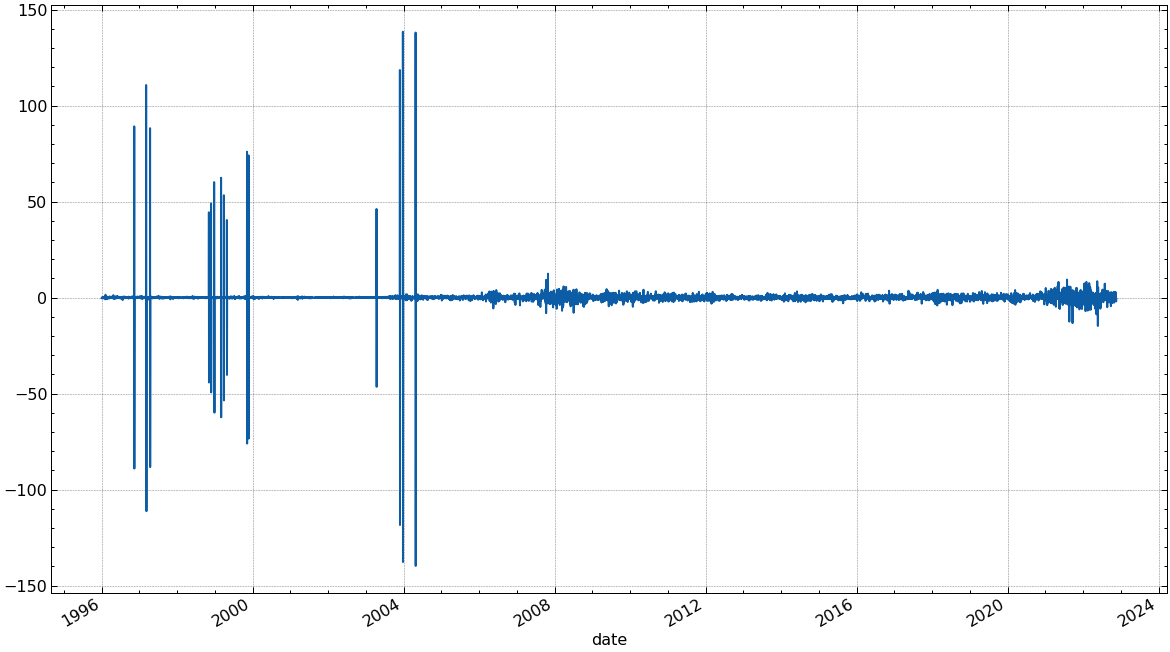

In [41]:
price_change['1 day change'] = price_change['Close'] - price_change['Close'].shift(1)
price_change['1 day change'].plot(figsize=(20,12))
price_change


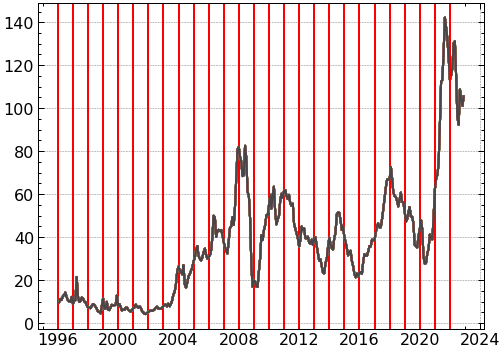

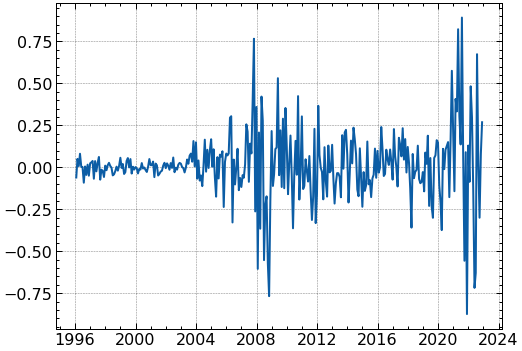

In [42]:

yr = 1996+np.arange(27)
for x in yr:
  plt.plot(dxx['Close'].resample('m').mean())
  plt.axvline(Timestamp(str(x)),color="red")
  
plt.show()

plt.plot(price_change['1 day change'].resample('m').mean())

plt.show()


# 4)AUGMENTED DICKEY FULLER TEST FOR STATIONARITY

  AUGMENTED DICKEY-FULLER TEST

In [43]:
from statsmodels.tsa.stattools import adfuller
def stationarity(f):
  dftest = adfuller(f,autolag='AIC')
  #print(dftest)
  return dftest[1]

#### 4.1)Volume Column is  Stationary tested  1.0742915736425421e-05


###*4.2*) Close Column is Not Stationary 0.5867630070875414

In [44]:
p=stationarity(dxx['Volume'])
q = stationarity(dxx['Close'])

if p < 0.05 :
  print(p,"The Given Column is Stationary")
if q<0.05:
  print(q,"The Given Column is Stationary")
else:
  print(q,"The given column in not stationary ")

1.0742915736425421e-05 The Given Column is Stationary
0.5867630070875414 The given column in not stationary 


diffrencing

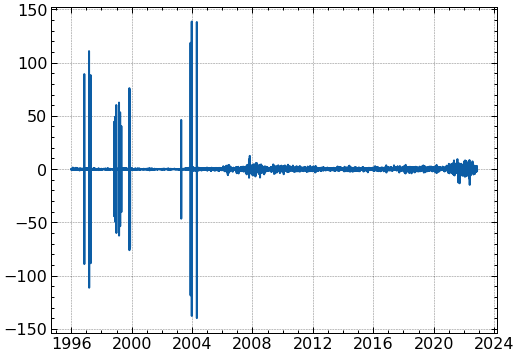

In [45]:
rj  = dxx.copy()

rj['new_close'] = rj['Close'].diff() 
newk = rj['new_close'].dropna()
plt.plot(newk)

In [46]:
stationarity(newk)

2.2362073834186537e-28

                 Open       High        Low      Close  Adj Close  Volume
date                                                                     
1996-01-26   8.800729   8.800729   8.800729   8.800729   2.020469   1.001
1996-01-27   8.800729   8.800729   8.800729   8.800729   2.020469   1.001
1996-01-28   8.800729   8.800729   8.800729   8.800729   2.020469   1.001
1996-02-21  11.172855  11.172855  11.172855  11.172855   2.565062   1.001
1996-03-05  10.903359  10.903359  10.903359  10.903359   2.503191   1.001
...               ...        ...        ...        ...        ...     ...
2009-05-02  22.684658  22.684658  22.684658  22.684658   7.370838   1.001
2009-05-03  22.684658  22.684658  22.684658  22.684658   7.370838   1.001
2009-10-13  51.981312  51.981312  51.981312  51.981312  17.530546   1.001
2014-04-24  40.638981  40.638981  40.638981  40.638981  15.085728   1.001
2014-10-15  43.449554  43.449554  43.449554  43.449554  16.456940   1.001

[188 rows x 6 columns]


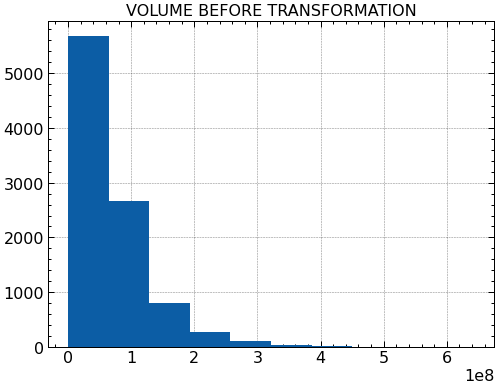

0.358218273925298


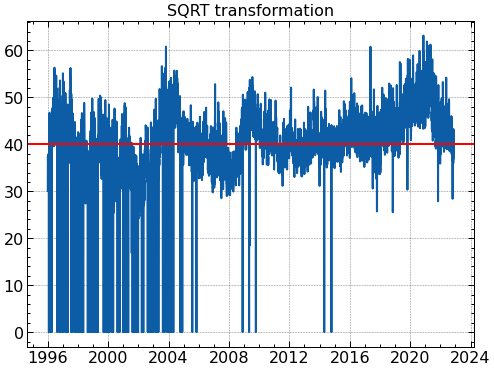

date
1996-01-01    30.052575
1996-01-02    32.900080
1996-01-03    31.587018
1996-01-04    37.430700
1996-01-05    36.479502
                ...    
2022-11-13    43.259578
2022-11-14    40.700363
2022-11-15    37.473383
2022-11-16    38.450051
2022-11-17    37.057096
Name: Volume, Length: 9566, dtype: float64
1.1317785563733585e-07


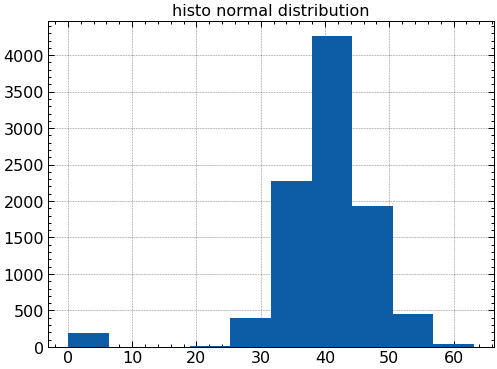

In [47]:
from scipy.stats import boxcox 
dxx['Volume'].describe()
pw = dxx.copy()
pw['Volume'].replace(to_replace= 0, value = 1.001, inplace=True )
print(pw[pw['Volume']==1.001])
plt.hist(pw['Volume'])
plt.title('VOLUME BEFORE TRANSFORMATION')
plt.show()

pw['Volume'],lam = boxcox(pw['Volume'])
safe = pw.copy()
print(lam)
#0.35 is closer to 0 so taking log transformation
# expo  to log 

log_diff = np.sqrt(pw['Volume'])
plt.plot(log_diff)
plt.title("SQRT transformation")
plt.axhline(y=log_diff.mean(),color="red")
plt.show()
z=stationarity(log_diff) #6.48*e^-5
print(log_diff)
plt.hist(log_diff)
plt.title("histo normal distribution")
print(z)

In [48]:
#dense
log_diff = log_diff.to_frame()
type(log_diff)

pandas.core.frame.DataFrame

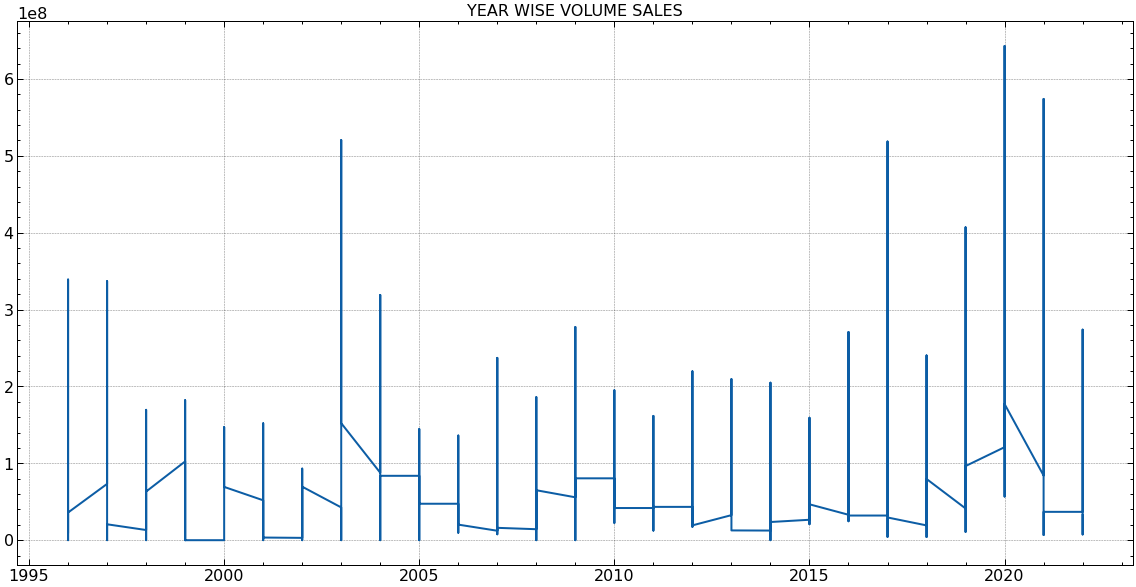

In [49]:

fig,axs = plt.subplots(figsize=(20,10))
axs.plot(dxx.index.year,dxx['Volume'])
plt.title("YEAR WISE VOLUME SALES")
plt.show()
#trend is there 



date
1996-01-01             NaN
1996-01-02             NaN
1996-01-03             NaN
1996-01-04             NaN
1996-01-05             NaN
                  ...     
2022-11-13    4.721986e+07
2022-11-14    4.791340e+07
2022-11-15    4.799842e+07
2022-11-16    4.826334e+07
2022-11-17    4.827794e+07
Name: Volume, Length: 9566, dtype: float64

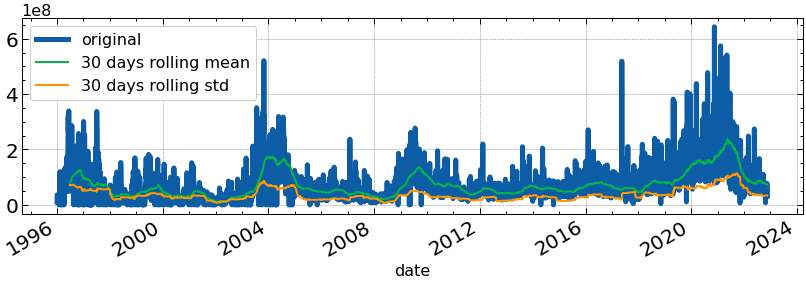

In [50]:
dxx.Volume.plot(figsize=(14,4),linewidth=5,fontsize=20,label="original")
dxx.Volume.rolling(30*6).mean().plot(label="30 days rolling mean")
dxx.Volume.rolling(30*6).std().plot(label="30 days rolling std")
plt.legend()
days30_cum = dxx.Volume.rolling(30).mean()
days30_cumvar = dxx.Volume.rolling(30).var()

days30_cum

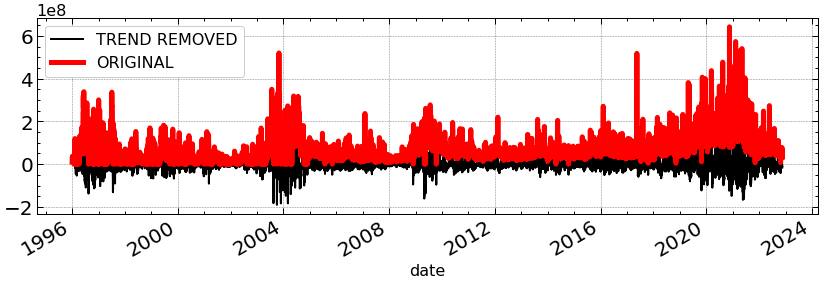

In [51]:
trend_rem_vol=dxx['Volume']-days30_cum
(dxx['Volume']-days30_cum).plot(color="black")
trend_rem_vol.dropna(inplace=True)
#trend_rem_vol.plot(color="black")
dxx.Volume.plot(figsize=(14,4),linewidth=5,fontsize=20,color="red")
plt.legend(["TREND REMOVED",'ORIGINAL'])

In [52]:
trend_rem_vol.index.name="YEARS"
trend_rem_vol.interpolate(method='time',inplace=True,limit_direction='backward')
trend_rem_vol

YEARS
1996-01-30    9.300145e+06
1996-01-31    1.122828e+07
1996-02-01   -5.112387e+06
1996-02-02    1.527197e+07
1996-02-03    1.510704e+07
                  ...     
2022-11-13    3.071356e+07
2022-11-14    7.561022e+06
2022-11-15   -1.299100e+07
2022-11-16   -7.859169e+06
2022-11-17   -1.538311e+07
Name: Volume, Length: 9537, dtype: float64

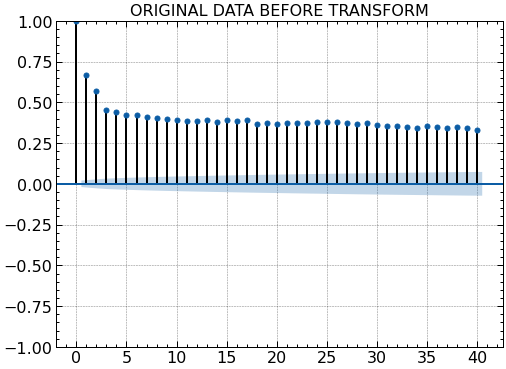

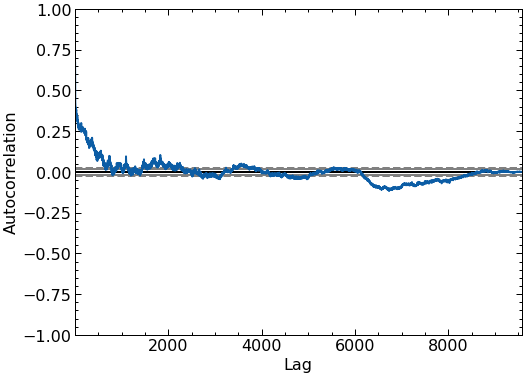

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(log_diff['Volume'])
plt.title('ORIGINAL DATA BEFORE TRANSFORM')
plt.show()
pd.plotting.autocorrelation_plot(log_diff.Volume)

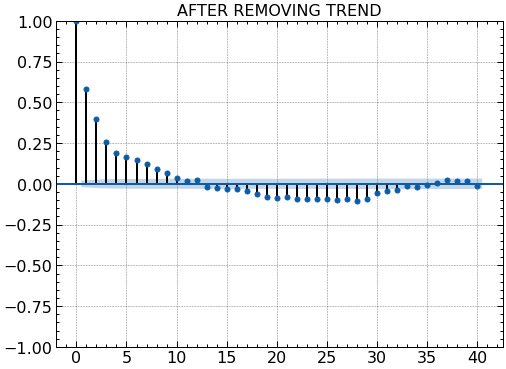

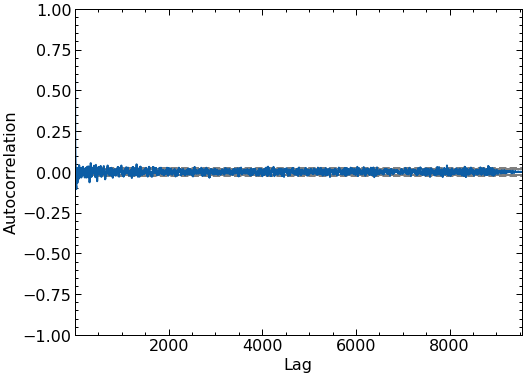

In [54]:
plot_acf(trend_rem_vol)
plt.title('AFTER REMOVING TREND')
plt.show()
pd.plotting.autocorrelation_plot(trend_rem_vol)


#stationary
  # p=2.4*e^-30
  # trend removed
  # autocorelation every lag is within the range
  # 

In [55]:
trend_rem_vol=trend_rem_vol.to_frame()


1996 0.19151835653275007 0.0003475639844971841
1997 6.322112071101031e-07 1.405526544448288e-09
1998 3.6483119459315225e-05 2.8038909432187033e-07
1999 1.4314636252524286e-05 4.860374132364632e-08
2000 4.527329997267277e-08 1.9159912686574062e-08
2001 0.3746853699873176 0.022643458113736383
2002 0.41198709961638863 1.4620942758951035e-05
2003 0.3407145319570847 9.241509601293994e-06
2004 0.16314242939303297 0.0016918334072877467
2005 3.37332632125238e-08 1.0075330496714669e-09
2006 1.220374224081447e-07 6.378168979934297e-11
2007 6.394190072843427e-07 9.573668681702054e-08
2008 0.6481619095312425 0.00607597130867061
2009 1.1198611591120581e-09 1.0081493560558062e-17
2010 9.584257648079065e-09 2.2296545492290343e-14
2011 0.2742144851175124 2.0501450452969165e-12
2012 0.020192570449672834 3.0976871288718714e-13
2013 0.015405972973784408 4.4532999801123994e-07
2014 1.751783978118692e-08 2.851105979728607e-09
2015 0.01267366336670824 6.019288951550053e-19
2016 2.363482926635362e-11 1.94372

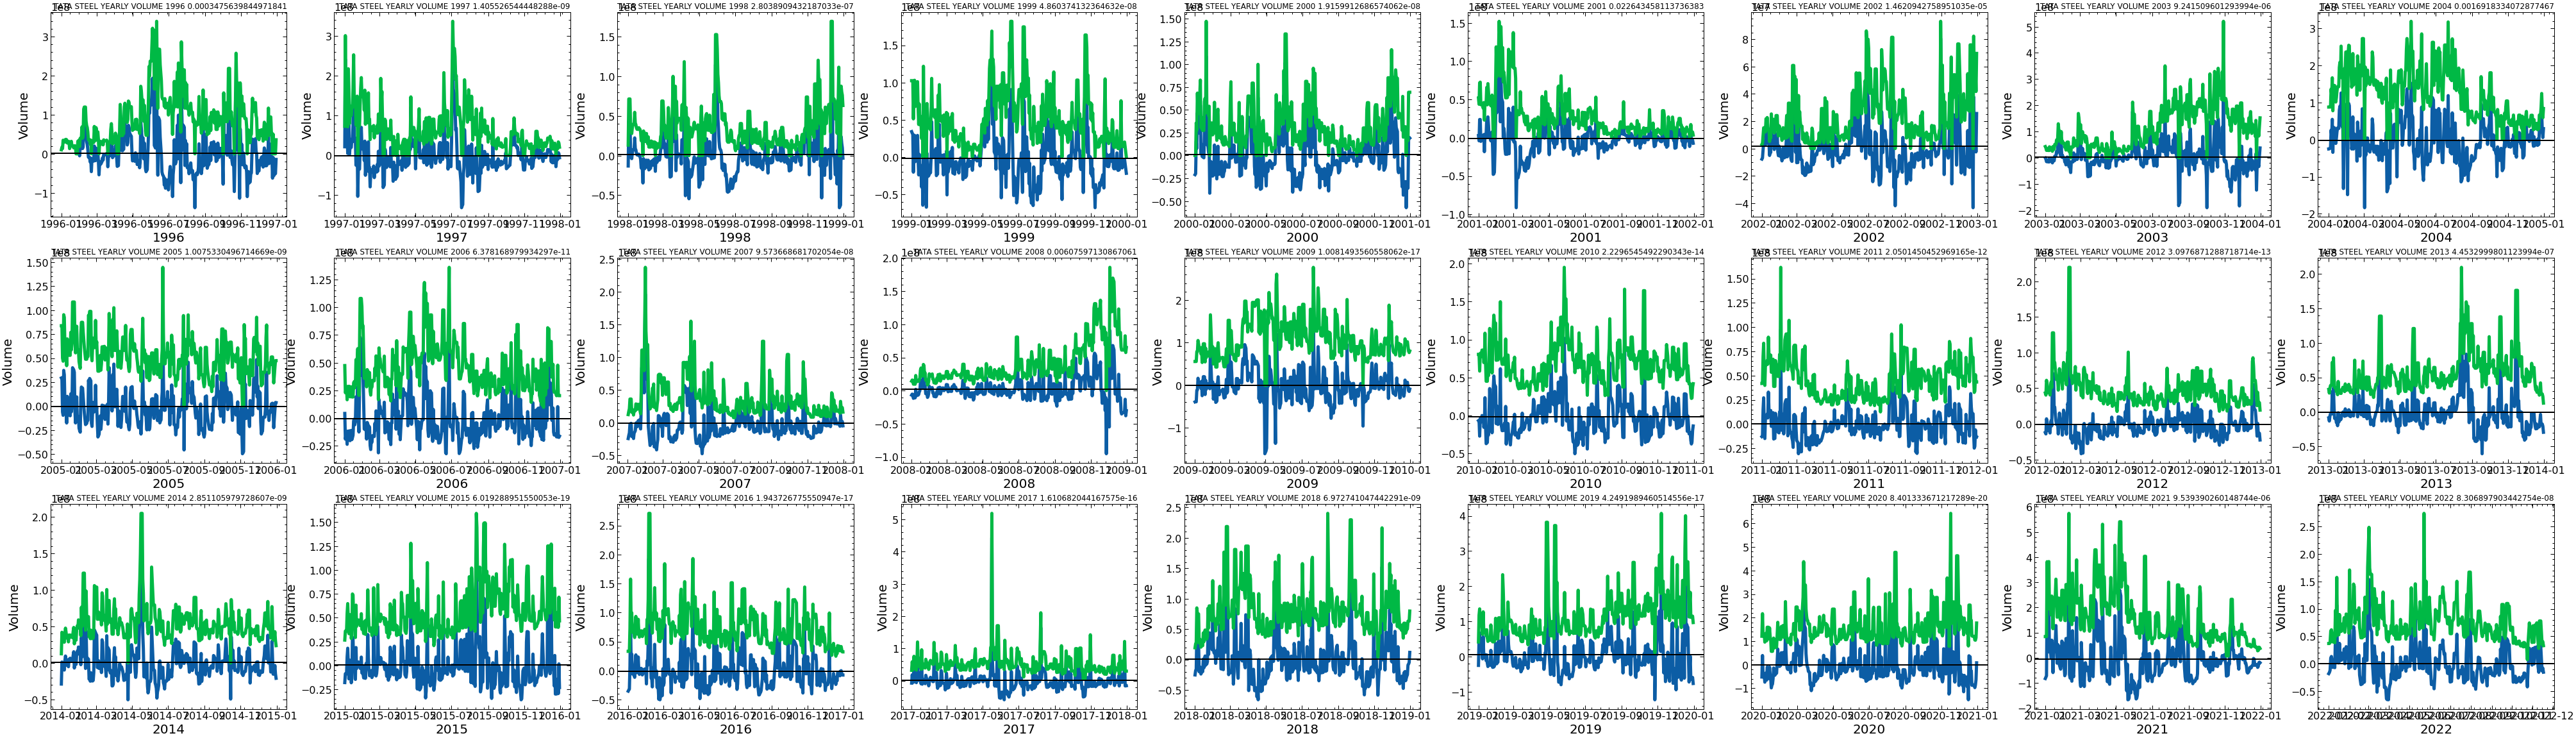

In [56]:
fig, axs = plt.subplots(3,9, figsize=(70, 20))
datee = 1996
year = datee+np.arange(27)
for nn, ax in enumerate(axs.flat):
  if nn<len(year):
    ax.plot(trend_rem_vol['Volume'].loc[str(year[nn])],data=df,linewidth=5)
    ax.plot(dxx['Volume'].loc[str(year[nn])],data=df,linewidth=5)
    ax.axhline(trend_rem_vol['Volume'].loc[str(year[nn])].mean(),color="black")

    y="Volume"
    print(year[nn],stationarity(dxx[y].loc[str(year[nn])]),stationarity(trend_rem_vol[y].loc[str(year[nn])]))
    set1=stationarity(dxx[y].loc[str(year[nn])])
    set= stationarity(trend_rem_vol[y].loc[str(year[nn])])
    ax.set_title("TATA STEEL YEARLY VOLUME"+" "+str(year[nn])+" "+str(set), fontsize='large', loc='right')
    ax.set_xlabel(year[nn],fontsize=20)
    ax.set_ylabel("Volume",fontsize=20)
    ax.grid()

[Text(0.5, 1.0, 'after removing trend')]

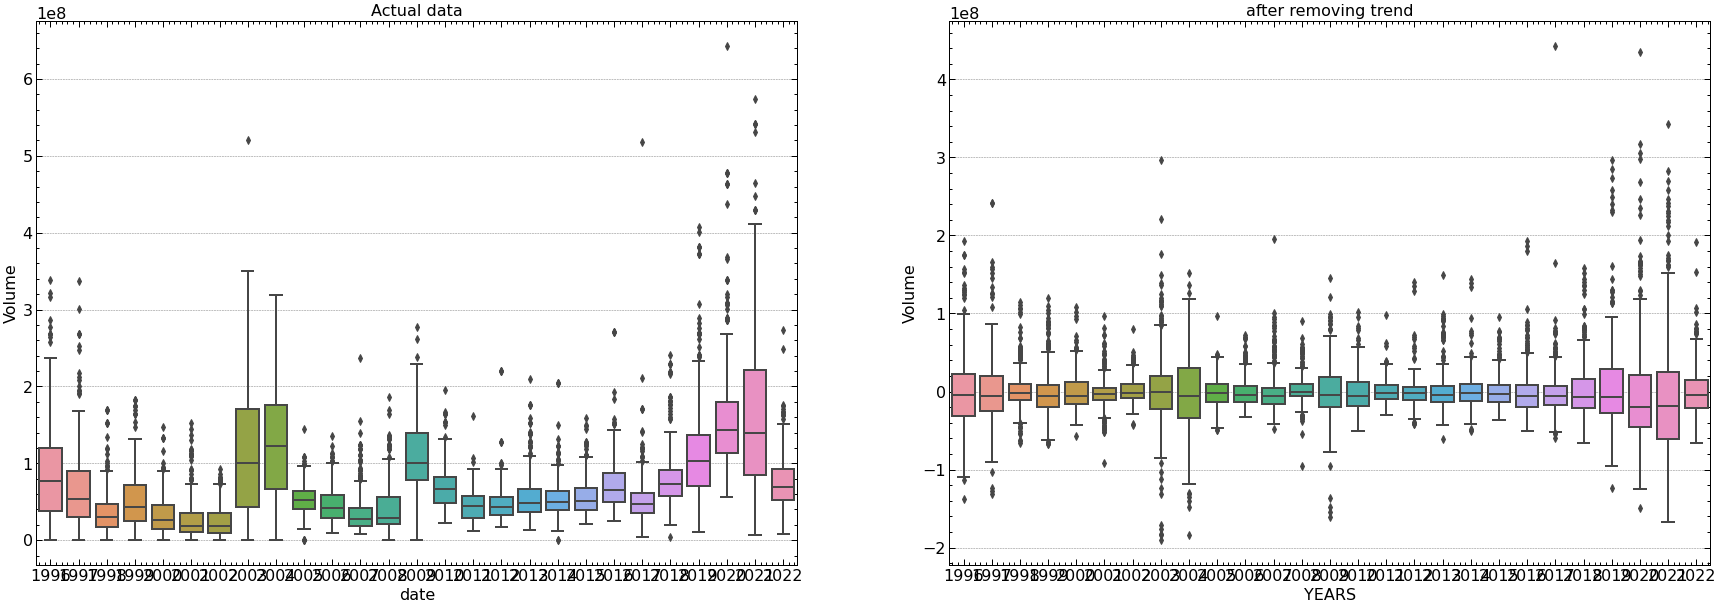

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.boxplot(ax=axes[0],data=dxx,x=dxx.index.year,y='Volume').set(title="Actual data")
sns.boxplot(ax=axes[1],data=trend_rem_vol,x=trend_rem_vol.index.year,y='Volume').set(title="after removing trend")

#Inference
#year  2020 has high annual volume  as 
 #                   As per Indian Steel Association (ISA), steel demand will grow by 7.2% in 2019-20 and 2020-21. Huge scope
 #                   for growth is offered by India's comparatively low per capita steel consumption and
 #                   the expected rise in consumption due to increased infrastructure construction and 
 #                   the thriving automobile and railways sectors


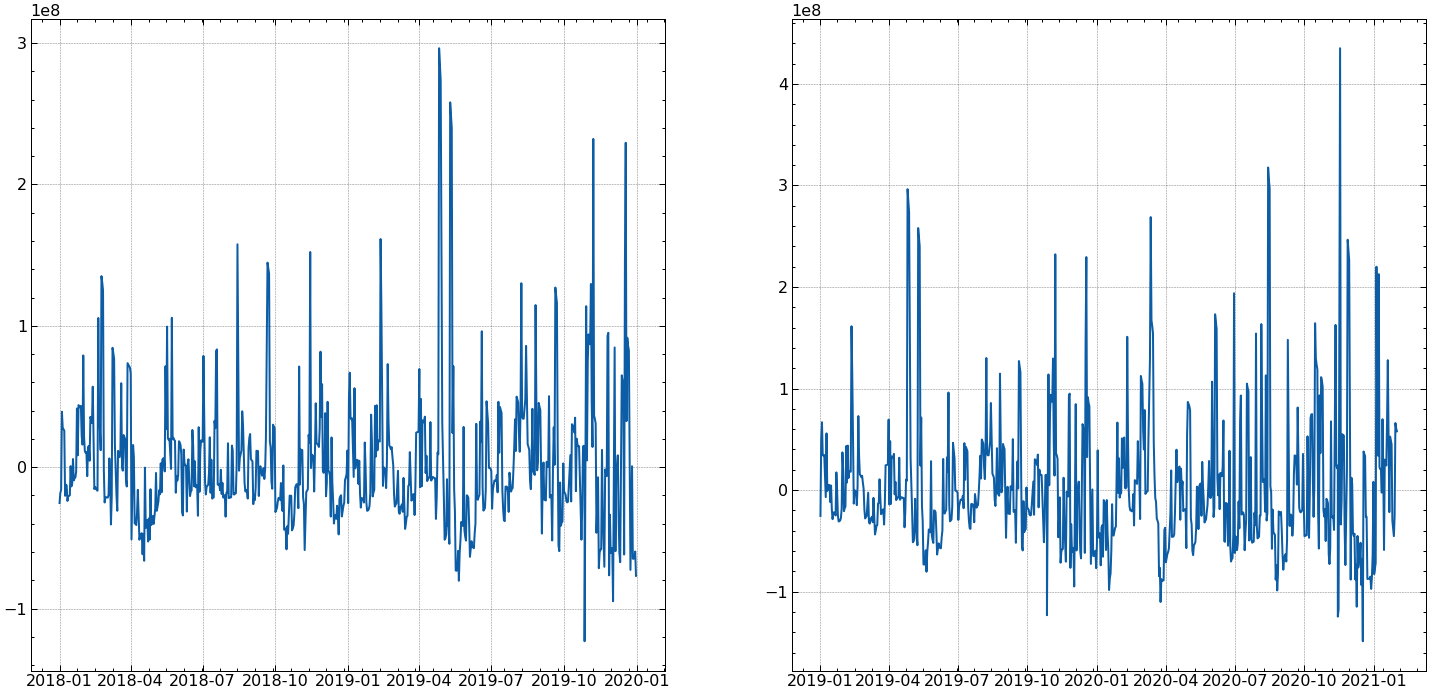

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(25, 12))
axes[0].plot(trend_rem_vol.loc['2018':'2019'])
axes[1].plot(trend_rem_vol.loc['2019-01':'2021-01'])
#check the graph peak point increading

#inference june or mid month more stocks are bought

Text(0.5, 1.0, 'Week wise volume')

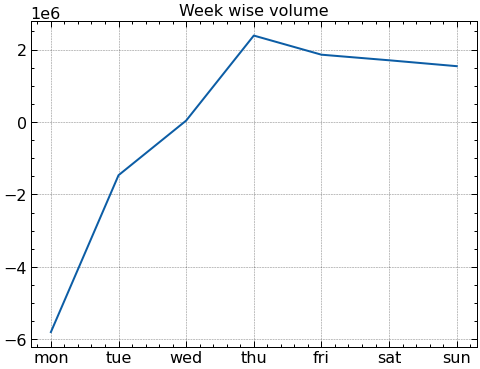

In [59]:
by_weekday  = trend_rem_vol.groupby(trend_rem_vol.index.dayofweek).mean()
by_weekday.index =['mon','tue','wed','thu','fri','sat','sun']
plt.plot(by_weekday)
plt.title('Week wise volume')

#inference 
#wed to thursday more stocks are buyed 

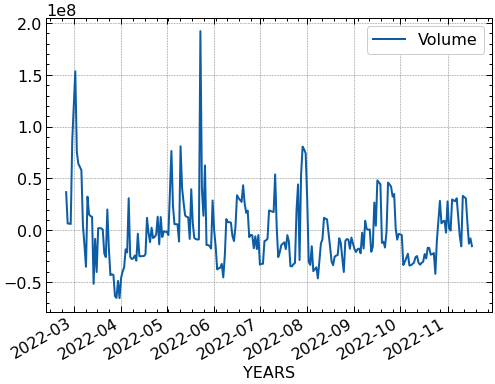

In [60]:
#inference
#Tata Steel announced that they had to find alternative sources of coal for their steel production plants 
#in the UK and Netherlands after European nations stopped doing business with Russia because of its invasion of Ukraine
trend_rem_vol.loc['2022-02-24':].plot()

#  5) Linear Regression price prediction

[44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32833576, 44123467.32

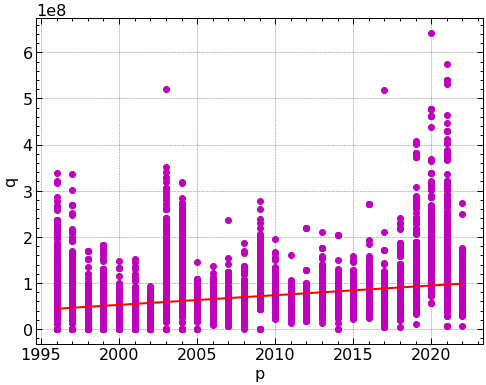

In [61]:
#linear regression 
import numpy as np
import matplotlib.pyplot as plt

def sse(p):

  p_m = np.mean(p)
  
  sse_1 = 0
  for y in p:
    sse_1 += (y-p_m)*(y-p_m)
  
  return sse_1

def co_var(p,q):
  i=0
  z=0
  for y in p:
       z+=( (y-np.mean(p)) * (q[i]-np.mean(q)) )
       
       i+=1
  return z

def coeff(p,q):
  b = []
  a2 = sse(p)
  cov = co_var(p,q)
  #b1
  b.append(cov/a2)
  #b0
  b.append(np.mean(q)-np.mean(p)*(b[0]))
  return b

def plot(p,q,pred):
  plt.scatter(p,q,color="m")
  plt.plot(p,pred,color="red")
  plt.xlabel("p")
  plt.ylabel("q")
  plt.show()


def main():
  p = dxx.index.year
  q = dxx.Volume
  c = coeff(p,q)
  pred_values = []
  pred = "c[1]+c[0]*x"
  
  for x in p:
    pred_values.append(eval(pred))
  print(pred_values)

  plot(p,q,pred_values)

if __name__==main():
  main()
  

### 5.1) Closing Price

[[37.19997567]
 [50.59274885]
 [ 7.7358747 ]
 ...
 [ 5.05732006]
 [31.8428664 ]
 [69.34263129]]
slope(m) [[2.67855463]]
Intercept(c) [-5344.01628475]


Text(0.5, 1.0, 'Friday stock Prediction using LR')

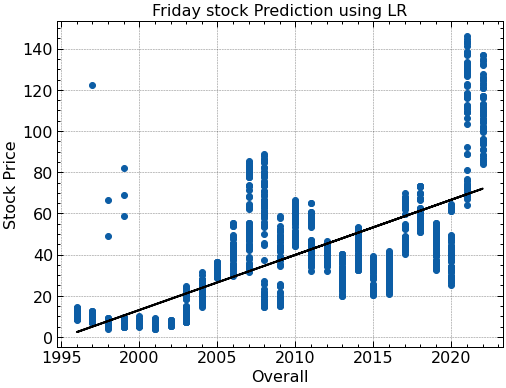

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
d1 = pd.DataFrame(dxx.index.year)
d2 = pd.DataFrame(dxx['Close'])

x = d1
y = d2
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1) 
r = LinearRegression()
r.fit(x_train,y_train)
y_predict = r.predict(x_test)
print(y_predict)
print('slope(m)',r.coef_)
print('Intercept(c)',r.intercept_)
plt.scatter(x=x_test,y=y_test)
plt.plot(x_test,y_predict,color="black")
plt.xlabel("Overall")
plt.ylabel("Stock Price")
plt.title("Friday stock Prediction using LR")

In [63]:
from sklearn import metrics 
print('MAE',metrics.mean_absolute_error(y_test,y_predict))
print('MSE',metrics.mean_squared_error(y_test,y_predict))
print('R-squared',metrics.r2_score(y_test,y_predict))
print('MAE',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE 14.297136059137479
MSE 383.0978078894629
R-squared 0.5095661636182403
MAE 19.57288450610852


####5.1.1) Closing Price from day 1 to 365 days

MAE 1.0933406263640233
MSE 2.2732781819643253
R-squared -0.04701831237378751
MAE 1.5077394277408565


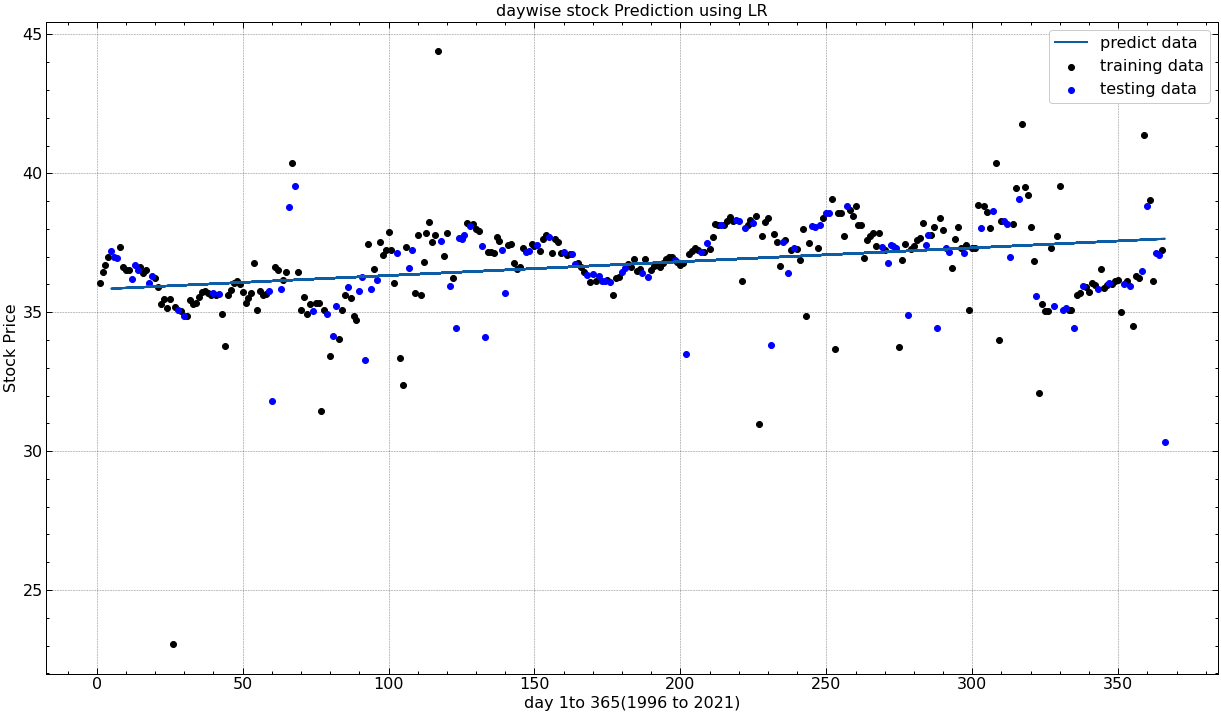

In [64]:
x2 = dxx.index.dayofyear.unique()
y2 = dxx['Close'].groupby(dxx.index.dayofyear).mean()
x3 = pd.DataFrame(x2)
y3 = pd.DataFrame(y2)
x_train, x_test, y_train, y_test = train_test_split(x3, y3, train_size=0.7, random_state=1) 
r = LinearRegression()
r.fit(x_train,y_train)
y_predict = r.predict(x_test)
plt.figure(figsize=(21,12))
plt.scatter(x=x_train,y=y_train,color="black",label="training data")
plt.scatter(x=x_test,y=y_test,color="blue",label="testing data")
plt.plot(x_test,y_predict,label="predict data")
plt.xlabel("day 1to 365(1996 to 2021)")
plt.ylabel("Stock Price")
plt.title("daywise stock Prediction using LR")
plt.legend()

print('MAE',metrics.mean_absolute_error(y_test,y_predict))
print('MSE',metrics.mean_squared_error(y_test,y_predict))
print('R-squared',metrics.r2_score(y_test,y_predict))
print('MAE',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

#### 5.2.1) november month prediction

In [65]:
x2 = dxx.index.day.unique()
y2 = dxx['Close'].groupby(dxx.index.month==11).mean()
new = dxx.loc[dxx.index.month==11]
new1 = new['Close'].resample('m').mean()
new1 = new1.dropna()


MAE 13.40169297074533
MSE 272.3994869804879
R-squared 0.17137092860112546
MAE 16.504529286849955


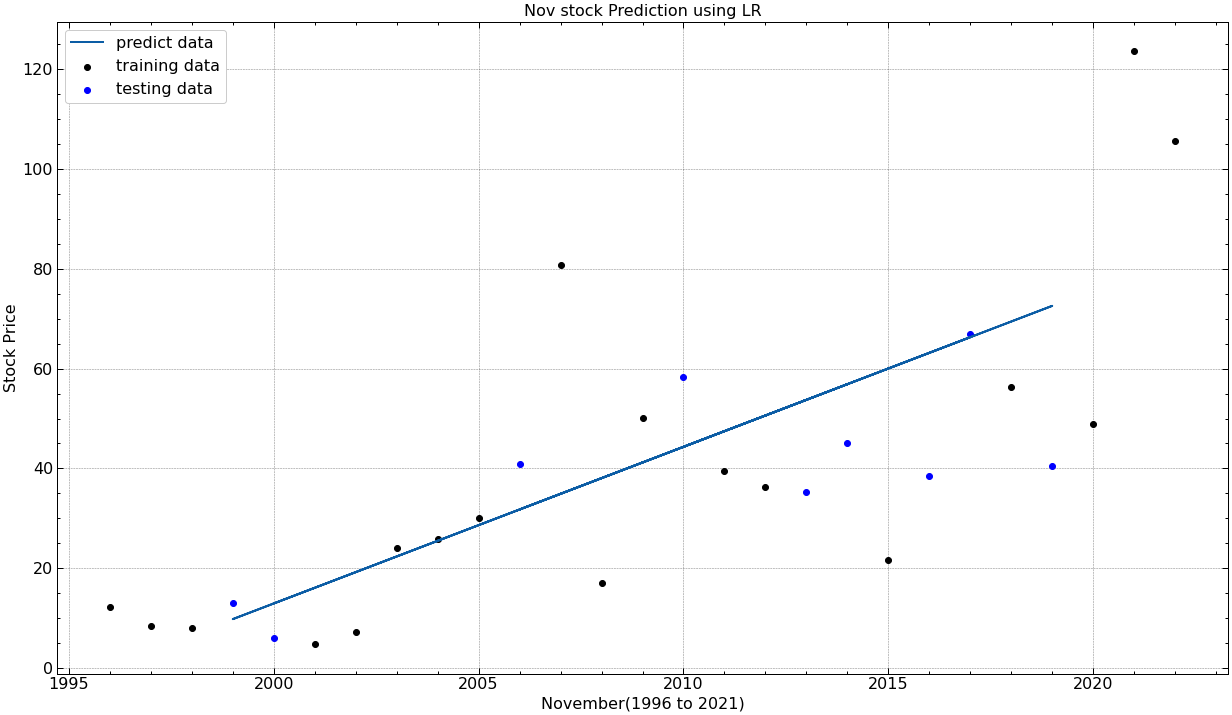

In [66]:
x4 = pd.DataFrame(new1.index.year.unique())
y4 = pd.DataFrame(new1)

x3 = pd.DataFrame(x4)
y3 = pd.DataFrame(y4)
x_train, x_test, y_train, y_test = train_test_split(x3, y3, train_size=0.7, random_state=1) 
r = LinearRegression()
r.fit(x_train,y_train)
y_predict = r.predict(x_test)
plt.figure(figsize=(21,12))
plt.scatter(x=x_train,y=y_train,color="black",label="training data")
plt.scatter(x=x_test,y=y_test,color="blue",label="testing data")
plt.plot(x_test,y_predict,label="predict data")
plt.xlabel("November(1996 to 2021)")
plt.ylabel("Stock Price")
plt.title("Nov stock Prediction using LR")
plt.legend()

print('MAE',metrics.mean_absolute_error(y_test,y_predict))
print('MSE',metrics.mean_squared_error(y_test,y_predict))
print('R-squared',metrics.r2_score(y_test,y_predict))
print('MAE',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

#### 5.3.1) Friday Prediction

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[[74.98973065]]
MAE 13.65624306913432
MSE 338.8935260198676
R-squared 0.5435637952987986
MAE 18.409060976048387


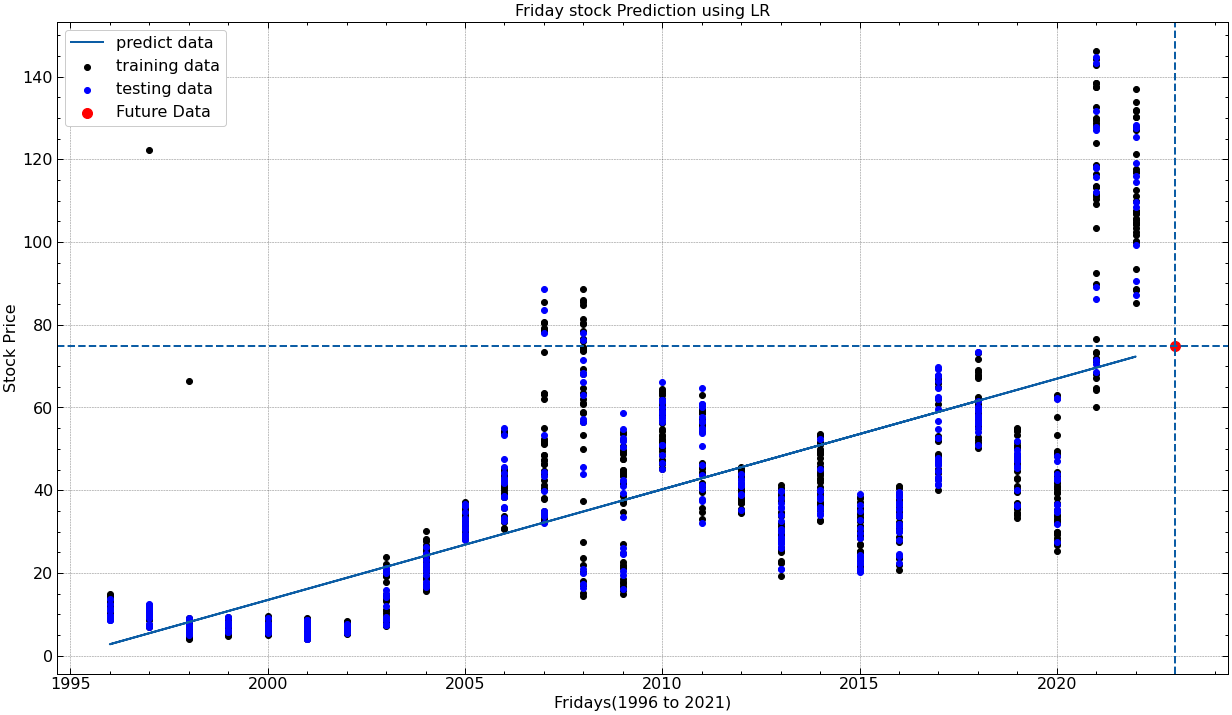

In [67]:

y4 = dxx.Close.loc[dxx.index.weekday==5]
x4 = y4.index.year

x3 = pd.DataFrame(x4)
y3 = pd.DataFrame(y4)
x_train, x_test, y_train, y_test = train_test_split(x3, y3, train_size=0.7, random_state=1) 
r = LinearRegression()
r.fit(x_train,y_train)
y_predict = r.predict(x_test)
plt.figure(figsize=(21,12))
plt.scatter(x=x_train,y=y_train,color="black",label="training data")
plt.scatter(x=x_test,y=y_test,color="blue",label="testing data")
plt.plot(x_test,y_predict,label="predict data")

# Future Data [[]] for dataframe
print(r.predict([[2023]]))
u  = r.predict([[2023]])
plt.scatter(2023,u,color="red",marker='o',s=100,label="Future Data")
plt.axhline(u,linestyle='dashed')
plt.axvline(2023,linestyle='dashed')
plt.xlabel("Fridays(1996 to 2021)")
plt.ylabel("Stock Price")
plt.title("Friday stock Prediction using LR")
plt.legend()

print('MAE',metrics.mean_absolute_error(y_test,y_predict))
print('MSE',metrics.mean_squared_error(y_test,y_predict))
print('R-squared',metrics.r2_score(y_test,y_predict))
print('MAE',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))





#6) ARIMA

In [68]:
ar = pd.DataFrame(newk)
ar


new_close
date                 
1996-01-02  -0.207737
1996-01-03   0.002808
1996-01-04  -0.348099
1996-01-05  -0.210545
1996-01-06   0.000000
...               ...
2022-11-13   0.000000
2022-11-14   1.149994
2022-11-15  -0.149994
2022-11-16  -2.000000
2022-11-17  -0.700005

[9565 rows x 1 columns]

0.5867630070875414

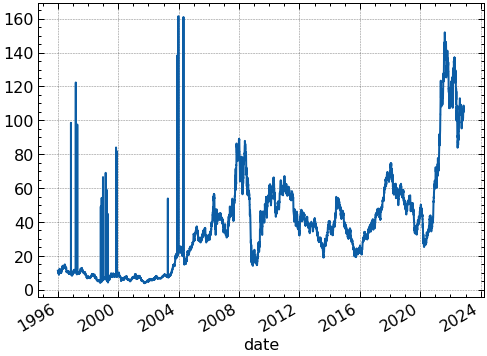

In [69]:
dxx['Close'].plot()
stationarity(dxx['Close'])

2.2362073834186537e-28

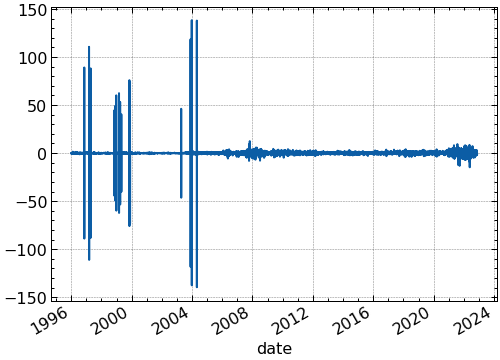

In [70]:
dxx['Close'].diff().plot()
stationarity(dxx['Close'].diff().dropna())

### 6.1)ARIMA WEEK PREDICTION

In [71]:
wn_c = dxx['Close'].groupby(dxx.index.day).mean()
wn_close = pd.DataFrame(wn_c)
print("STATIOANRITY OF WEEK PRICE",stationarity(wn_close))


STATIOANRITY OF WEEK PRICE 0.009346898696139652


### 1,0,1

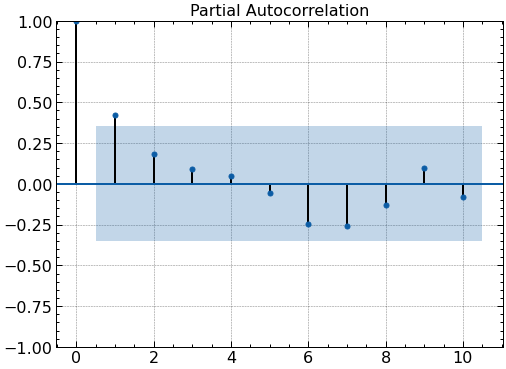

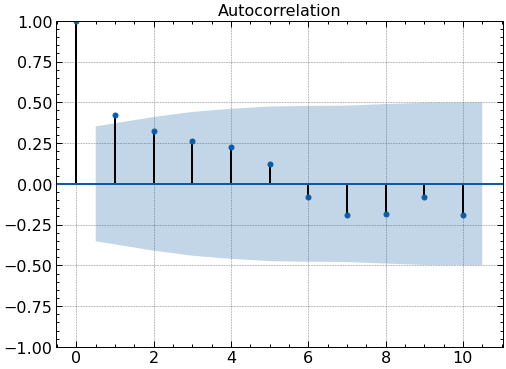

In [72]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt 
plot_pacf(wn_close, lags = 10, method = "ols")
plt.show()
plot_acf(wn_close,lags=10)
plt.show()


In [73]:
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(wn_close,order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   31
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -13.996
Date:                Tue, 10 Jan 2023   AIC                             35.992
Time:                        09:37:50   BIC                             41.728
Sample:                             0   HQIC                            37.862
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7080      0.150    245.488      0.000      36.415      37.001
ar.L1          0.7273      0.306      2.379      0.017       0.128       1.326
ma.L1         -0.3805      0.382     -0.997      0.3

In [74]:
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(wn_close,order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   31
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -14.578
Date:                Tue, 10 Jan 2023   AIC                             35.157
Time:                        09:37:50   BIC                             39.458
Sample:                             0   HQIC                            36.559
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7158      0.120    306.056      0.000      36.481      36.951
ar.L1          0.4242      0.174      2.435      0.015       0.083       0.766
sigma2         0.1490      0.043      3.446      0.0

### 6.3) AUTO-ARIMA

In [75]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import pmdarima as pm

In [77]:
model_arima = pm.auto_arima(wn_close,trace=True,error_action='ignore',test='adf',start_p=1,start_q=1,max=3,d=1,
                            supress_warnings=True,stepwise=False,seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42.509, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=37.135, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=39.129, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=40.906, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=42.771, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39.064, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=39.130, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=41.074, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=42.858, Time=0.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=44.761, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=39.507, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=41.038, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=41.725, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=41.441, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4

###6.4)graph

In [78]:
train = wn_close[:24]
test = wn_close[24:]
model = ARIMA(train,order=(1,0,1))
fitted = model.fit()
fc = fitted.forecast(len(test),alpha=0.05)
f_series = pd.DataFrame(fc)
new = test.index
f_series['date'] = new 
f_series.set_index('date',inplace=True)
f_series

predicted_mean
date                
25         36.521084
26         36.556802
27         36.584068
28         36.604881
29         36.620768
30         36.632896
31         36.642153

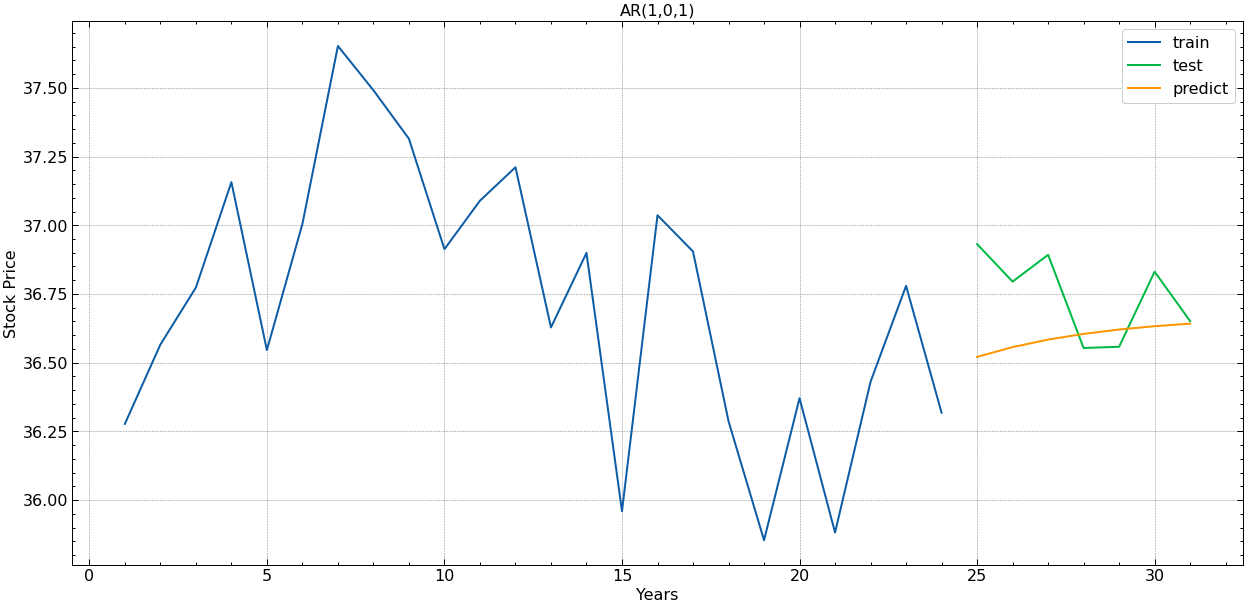

In [79]:
plt.figure(figsize=(21,10))
plt.xlabel("Years")
plt.ylabel("Stock Price")
plt.title("AR(1,0,1)")
plt.plot(train,label="train")
plt.plot(test,label="test")
plt.plot(f_series['predicted_mean'],label="predict")
plt.legend()
plt.show()


In [80]:
from sklearn import metrics 
import numpy as np
print('MAE',metrics.mean_absolute_error(test['Close'],f_series['predicted_mean']))
print('MSE',metrics.mean_squared_error(test['Close'],f_series['predicted_mean']))
print('rmse',np.sqrt(metrics.mean_squared_error(test['Close'],f_series['predicted_mean'])))
print("residual error",np.mean(test['Close'] - f_series['predicted_mean']))
print("CORR",np.corrcoef(test['Close'] - f_series['predicted_mean']))


MAE 0.182639351395358
MSE 0.05231573550781225
rmse 0.22872633321900707
residual error 0.15005188762746155
CORR 1.0


In [81]:
ar.to_csv("new.csv")

#7) Holt And Winter Prediction

Text(0.5, 0, 'date')

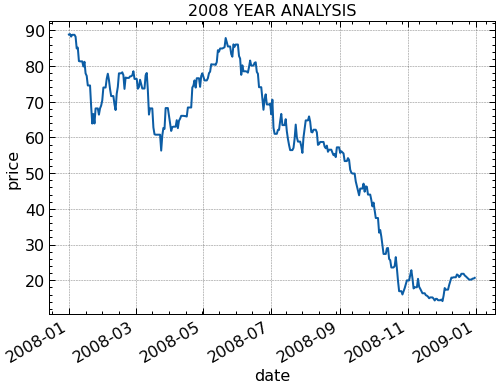

In [135]:
#holt and winter 
new_df = dxx['Close'].loc[dxx.index.year==2008]
new_df.plot()
plt.title("2008 YEAR ANALYSIS")
plt.ylabel("price")
plt.xlabel("date")

##inference is seasonality=additive                                   trend="multiplicative"

<Figure size 1440x216 with 0 Axes>

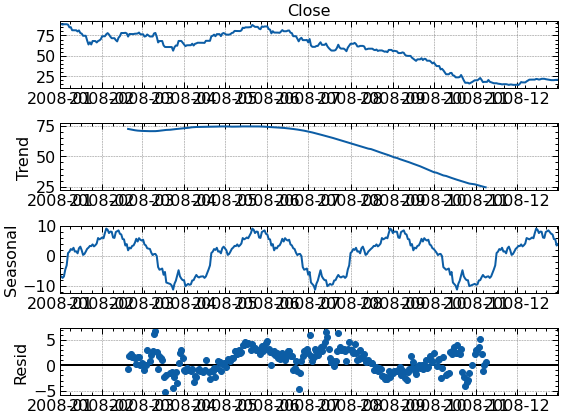

In [83]:
import statsmodels as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20,3))
seasonal_decompose(new_df,model="additive",period=100).plot()
plt.show()



In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#seasonal_periods is seasonilty for how many periods
trainx = new_df[:280]
testx = new_df[280:]
#fitting training data
hwmodel = ExponentialSmoothing(trainx,trend='mul',seasonal='add',seasonal_periods=4).fit()


In [85]:
test_pred = hwmodel.forecast(70)
test_pred

280    23.617273
281    23.257812
282    23.212669
283    22.753660
284    22.767416
         ...    
345     9.848116
346     9.809009
347     9.356034
348     9.375821
349     9.022771
Length: 70, dtype: float64

In [86]:
from sklearn import metrics
print("Mean Squared Error",metrics.mean_squared_error(testx,test_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(testx,test_pred)))


Mean Squared Error 33.512075718911056
Root Mean Squared Error 5.7889615406315365


In [87]:
new = pd.DataFrame(test_pred)
new['date'] = testx.index
new = new.set_index('date')
new

0
date                 
2008-10-18  23.617273
2008-10-19  23.257812
2008-10-20  23.212669
2008-10-21  22.753660
2008-10-22  22.767416
...               ...
2008-12-27   9.848116
2008-12-28   9.809009
2008-12-29   9.356034
2008-12-30   9.375821
2008-12-31   9.022771

[70 rows x 1 columns]

In [88]:
new_dxx = dxx['Close'].loc[dxx.index.year==2008]
x = new_dxx.index.dayofyear
y = new_dxx

x1 = pd.DataFrame(x)
y1 = pd.DataFrame(y)

x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.8, random_state=1) 
r = LinearRegression()
r.fit(x_train,y_train)
y_predict = r.predict(x_test)
print(y_predict)
print('slope(m)',r.coef_)
print('Intercept(c)',r.intercept_)


[[54.01022777]
 [41.83562955]
 [58.25289079]
 [78.1749606 ]
 [52.35005529]
 [71.16534345]
 [69.13624374]
 [57.51503635]
 [73.56337037]
 [39.25313902]
 [38.14635736]
 [39.62206624]
 [66.92268043]
 [88.68938634]
 [25.41836832]
 [44.04919286]
 [60.28199049]
 [59.35967244]
 [57.14610913]
 [56.40825469]
 [73.74783398]
 [39.06867541]
 [48.10739227]
 [89.9806316 ]
 [24.68051388]
 [46.6316834 ]
 [73.00997954]
 [35.56386683]
 [73.19444315]
 [51.79666446]
 [67.66053487]
 [23.75819583]
 [89.61170439]
 [33.16583991]
 [38.8842118 ]
 [67.47607126]
 [72.64105232]
 [70.42748901]
 [53.08790972]
 [30.76781299]
 [42.7579476 ]
 [47.73846505]
 [87.39814107]
 [28.92317689]
 [41.46670233]
 [25.78729553]
 [33.71923074]
 [73.37890676]
 [77.06817895]
 [23.57373222]
 [78.54388782]
 [55.11700943]
 [49.21417393]
 [89.796168  ]
 [65.26250795]
 [85.73796859]
 [70.2430254 ]
 [25.97175914]
 [74.48568842]
 [34.27262157]
 [69.32070735]
 [66.55375321]
 [28.00085885]
 [43.31133843]
 [31.69013103]
 [79.83513309]
 [88.50492

In [89]:

new_dxx = dxx['Close'].loc[dxx.index.year==2008]
p = new_dxx.index.year
q = new_dxx
p1 = pd.DataFrame(p)
q1 = pd.DataFrame(q)
q1.set_index(p,inplace=True)
q1

Close
date           
2008  88.818871
2008  88.942726
2008  88.237701
2008  88.733124
2008  88.733124
...         ...
2008  20.198015
2008  20.198015
2008  20.464783
2008  20.493364
2008  20.693439

[350 rows x 1 columns]

### 7.2) holt winter result

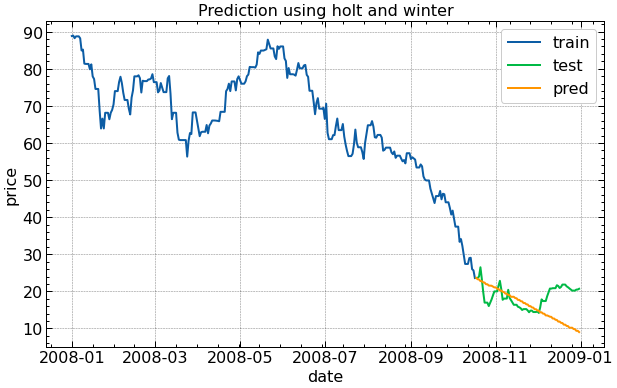

In [90]:
plt.figure(figsize=(10,6))
plt.plot(trainx,label="train")
plt.plot(testx,label="test")
plt.plot(new,label="pred")
plt.xlabel("date")
plt.ylabel("price")
plt.title("Prediction using holt and winter")
plt.legend()


In [91]:
from sklearn import metrics
print("Mean Squared Error",metrics.mean_squared_error(testx,test_pred))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(testx,test_pred)))



Mean Squared Error 33.512075718911056
Root Mean Squared Error 5.7889615406315365


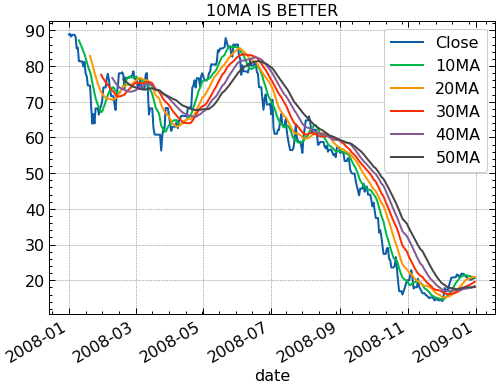

In [92]:
dxx['Close'][dxx.index.year==2008].plot()
dxx['Close'][dxx.index.year==2008].rolling(10).mean().plot(label="10MA")
dxx['Close'][dxx.index.year==2008].rolling(20).mean().plot(label="20MA")
dxx['Close'][dxx.index.year==2008].rolling(30).mean().plot(label="30MA")
dxx['Close'][dxx.index.year==2008].rolling(40).mean().plot(label="40MA")
dxx['Close'][dxx.index.year==2008].rolling(50).mean().plot(label="50MA")
plt.title("10MA IS BETTER")
plt.legend()

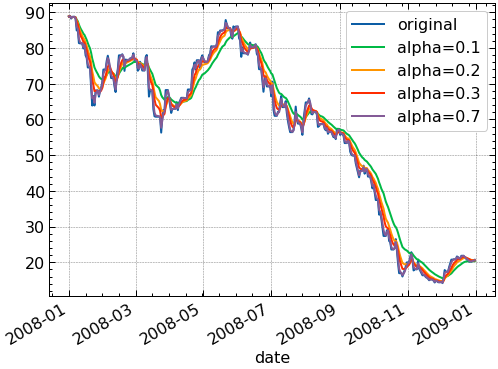

In [93]:
dxx['Close'][dxx.index.year==2008].plot(label="original")
dxx['Close'][dxx.index.year==2008].ewm(alpha=0.1).mean().plot(label="alpha=0.1")
dxx['Close'][dxx.index.year==2008].ewm(alpha=0.2).mean().plot(label="alpha=0.2")
dxx['Close'][dxx.index.year==2008].ewm(alpha=0.3).mean().plot(label="alpha=0.3")
dxx['Close'][dxx.index.year==2008].ewm(alpha=0.7).mean().plot(label="alpha=0.7")
plt.legend()

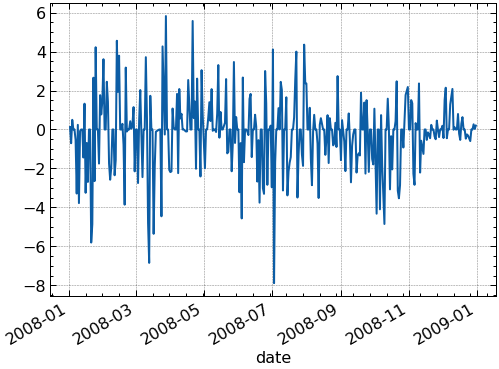

In [94]:
stationarity(dxx['Close'][dxx.index.year==2008])
stationarity(dxx['Close'][dxx.index.year==2008].diff().dropna())
dxx['Close'][dxx.index.year==2008].diff().dropna().plot()

In [95]:
ari = dxx['Close'][dxx.index.year==2008].diff().dropna()
trainy = ari[:249]
testy  = ari[249:]


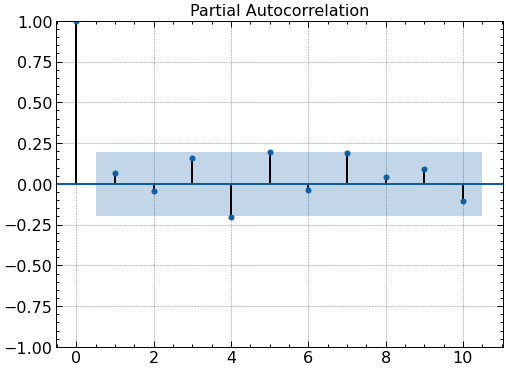

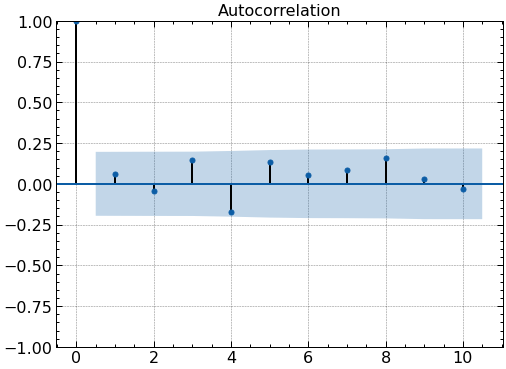

In [96]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt 
plot_pacf(testy, lags = 10, method = "ols")
plt.show()
plot_acf(testy,lags=10)
plt.show()

In [97]:
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(trainy,order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -526.576
Date:                Tue, 10 Jan 2023   AIC                           1059.153
Time:                        09:38:04   BIC                           1069.693
Sample:                             0   HQIC                          1063.396
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0080      0.053     -0.150      0.881      -0.112       0.097
ma.L1         -0.9999      1.502     -0.666      0.506      -3.944       1.944
sigma2         4.0009      5.996      0.667      0.5

In [98]:
fc = model_fit.forecast(len(testy),alpha=0.05)


In [99]:
testy

date
2008-09-16   -1.324306
2008-09-17   -1.219501
2008-09-18   -1.333832
2008-09-19    1.881653
2008-09-20    0.000000
                ...   
2008-12-27    0.000000
2008-12-28    0.000000
2008-12-29    0.266768
2008-12-30    0.028582
2008-12-31    0.200075
Name: Close, Length: 100, dtype: float64

# 8)TABLUATION ALL MODELS

In [100]:
dict = {'holt winter':[metrics.mean_squared_error(testx,test_pred),np.sqrt(metrics.mean_squared_error(testx,test_pred))],'MA':[metrics.mean_squared_error(dxx['Close'][dxx.index.year==2008].iloc[:341],dxx['Close'][dxx.index.year==2008].rolling(10).mean().dropna()),np.sqrt(metrics.mean_squared_error(dxx['Close'][dxx.index.year==2008].iloc[:341],dxx['Close'][dxx.index.year==2008].rolling(10).mean().dropna()))],
        'LINEAR REGRESSION':[metrics.mean_squared_error(y_test,y_predict),np.sqrt(metrics.mean_squared_error(y_test,y_predict))]
        ,'EXPO':[metrics.mean_squared_error(dxx['Close'][dxx.index.year==2008],dxx['Close'][dxx.index.year==2008].ewm(alpha=0.7).mean()),np.sqrt(metrics.mean_squared_error(dxx['Close'][dxx.index.year==2008],dxx['Close'][dxx.index.year==2008].ewm(alpha=0.7).mean()))],
        'ARIMA':[metrics.mean_squared_error(testy,fc),np.sqrt(metrics.mean_squared_error(testy,fc))]}
table  = pd.DataFrame(dict,index=['MSE','rmse'])
table

holt winter         MA  LINEAR REGRESSION      EXPO     ARIMA
MSE     33.512076  10.875101          96.920472  0.342878  1.946477
rmse     5.788962   3.297742           9.844820  0.585558  1.395162

# 9) S-ARIMA

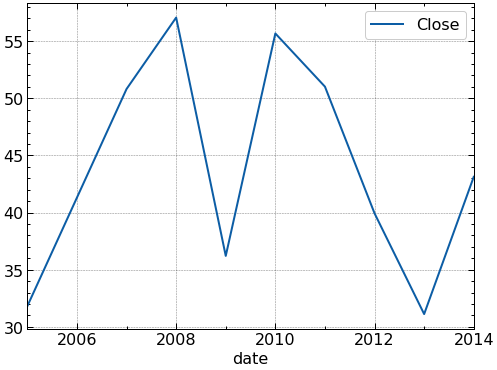

In [101]:
y = dxx['Close'].resample('ys').mean()
y = pd.DataFrame(y)
y[(y.index.year>2004)&(y.index.year<2015)].plot()


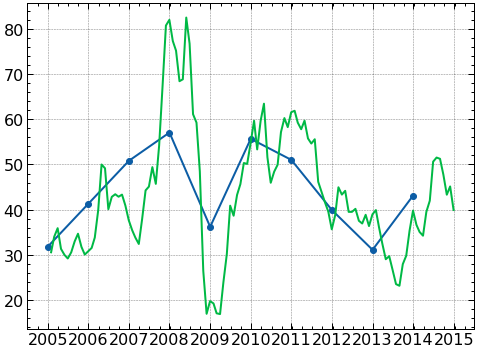

In [102]:
z = dxx['Close'].resample('m').mean()
z = pd.DataFrame(z)
plt.plot(y[(y.index.year>2004)&(y.index.year<2015)],marker='o')
plt.plot(z[(z.index.year>2004)&(z.index.year<2015)])


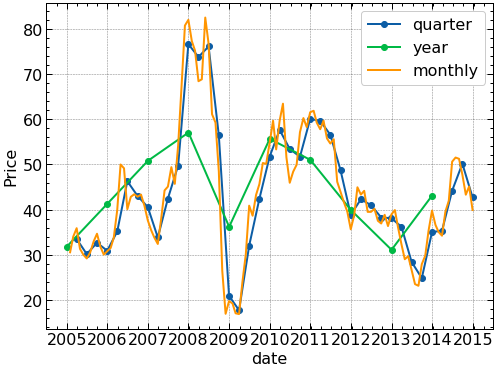

In [137]:
q = dxx['Close'].resample('q').mean()
plt.plot(q[(q.index.year>2004)&(q.index.year<2015)],marker='o',label="quarter")
plt.plot(y[(y.index.year>2004)&(y.index.year<2015)],marker='o',label="year")
plt.plot(z[(z.index.year>2004)&(z.index.year<2015)],label="monthly")
plt.xlabel("date")
plt.ylabel("Price")
plt.legend()



<Figure size 1440x216 with 0 Axes>

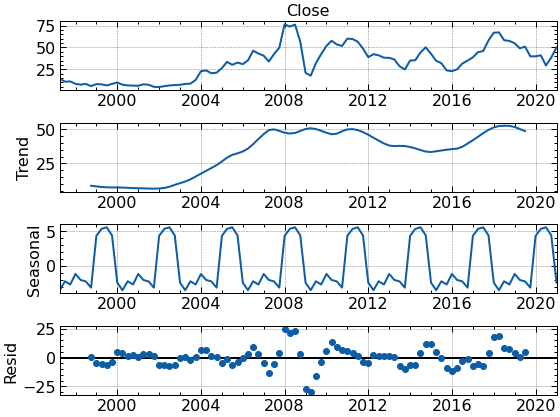

In [104]:
d = q[(q.index.year>1996)&(q.index.year<2021)]
import statsmodels as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(20,3))
seasonal_decompose(d,model="additive",period=12).plot()
plt.show()


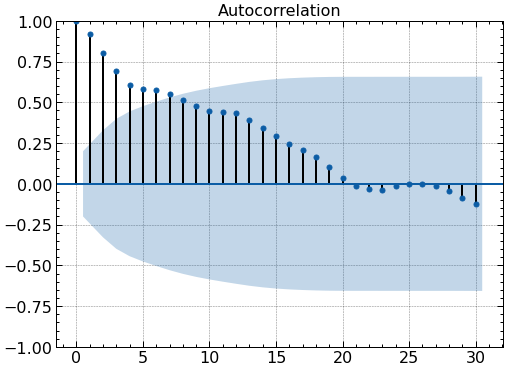

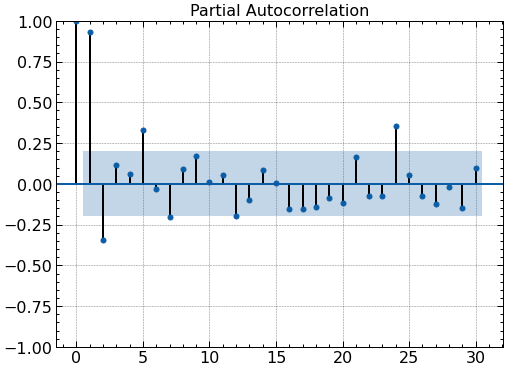

In [105]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(d.values.squeeze(), lags=30) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(d.values.squeeze(), lags=30)
plt.show()

In [106]:
print(stationarity(d.diff().dropna()))
print(stationarity(d))

1.890822572436794e-05
0.4958861665540518


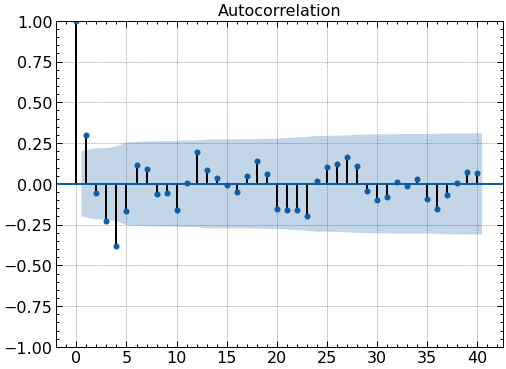

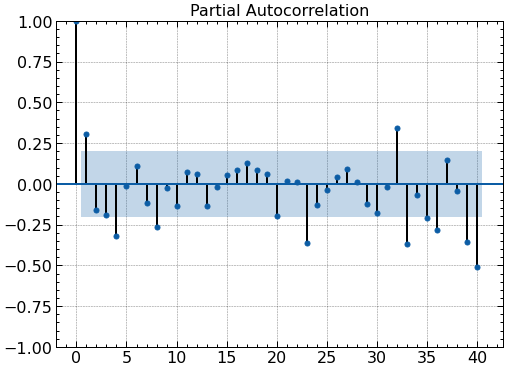

In [107]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(d.diff().dropna().values.squeeze(), lags=40) # You can change the lags value if you want to see more lags
sm.graphics.tsa.plot_pacf(d.diff().dropna().values.squeeze(), lags=40)
plt.show()

In [108]:
mod = sm.tsa.SARIMAX(d.diff().dropna(), order=(2,1,1),seasonal_order=(2,1,0,48))
res = mod.fit()
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                   95
Model:             SARIMAX(2, 1, 1)x(2, 1, [], 48)   Log Likelihood                -178.128
Date:                             Tue, 10 Jan 2023   AIC                            368.257
Time:                                     09:38:55   BIC                            379.229
Sample:                                 06-30-1997   HQIC                           372.367
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5010      1.643     -0.305      0.760      -3.721       2.719
ar.L2         -0.2053      

In [109]:
res.forecast(2)

2021-03-31    32.187793
2021-06-30    50.433171
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [110]:
mod = sm.tsa.SARIMAX(d.diff().dropna()[:76], order=(2,1,1),seasonal_order=(2,1,0,48))
res = mod.fit()


In [111]:
qq = d.diff().dropna()
test = qq[76:]
hu = pd.DataFrame(res.forecast(19))
print('MAE',metrics.mean_absolute_error(test,hu))
print('MSE',metrics.mean_squared_error(test,hu))
print('MAE',np.sqrt(metrics.mean_squared_error(test,hu)))

MAE 12.618524325890165
MSE 302.5494838015233
MAE 17.393949632027894


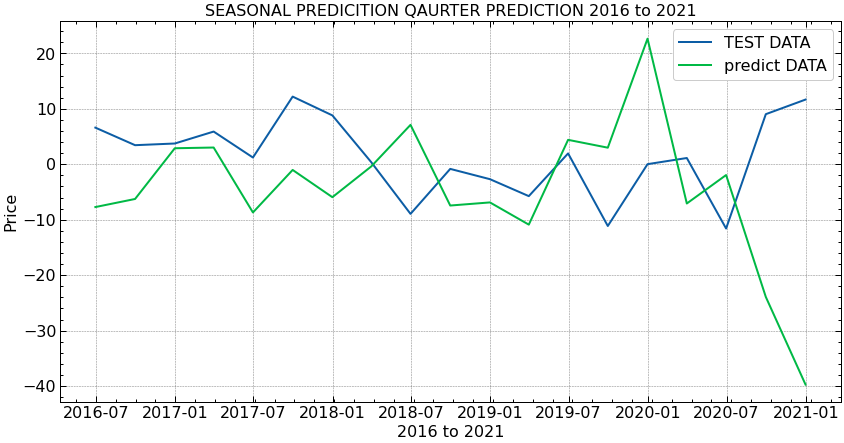

In [134]:
test = pd.DataFrame(test)
plt.figure(figsize=(14,7))
plt.plot(test,label="TEST DATA")
plt.plot(hu,label="predict DATA")
plt.title("SEASONAL PREDICITION QAURTER PREDICTION 2016 to 2021")
plt.xlabel("2016 to 2021")
plt.ylabel("Price")
plt.legend()
plt.show()

#10) multi arima

In [113]:
dxx2 = dxx.copy()

In [114]:
dxa = dxx2['Close'].diff().dropna()
dxb = dxx2['Open'].diff().dropna()
dxc = dxx2['High'].diff().dropna()
dxd = dxx2['Low'].diff().dropna()

In [115]:
print(stationarity(dxa))
print(stationarity(dxb))
print(stationarity(dxc))
print(stationarity(dxd))

2.2362073834186537e-28
2.6822051283210254e-28
4.0385395612927956e-28
1.6253845255378555e-28


In [116]:
dxa = pd.DataFrame(dxa)
dxb = pd.DataFrame(dxb)
dxc = pd.DataFrame(dxc)
dxd = pd.DataFrame(dxd)

In [117]:
dxa['Open'] = dxb
dxa['High'] = dxc
dxa['Low'] = dxd
dxa

Close      Open      High       Low
date                                              
1996-01-02 -0.207737  0.000000  0.000000 -0.084218
1996-01-03  0.002808 -0.193701  0.014036  0.000000
1996-01-04 -0.348099 -0.171242 -0.421087 -0.564258
1996-01-05 -0.210545 -0.303183 -0.252653 -0.070181
1996-01-06  0.000000  0.000000  0.000000  0.000000
...              ...       ...       ...       ...
2022-11-13  0.000000  0.000000  0.000000  0.000000
2022-11-14  1.149994  2.250000  1.800003  2.000000
2022-11-15 -0.149994  0.500000 -0.650002 -1.050003
2022-11-16 -2.000000 -0.550003 -0.549995 -2.000000
2022-11-17 -0.700005 -2.549995 -2.000000 -0.699997

[9565 rows x 4 columns]

In [118]:
new_train = dxa[['Open', 'High', 'Low']]

In [120]:
from pmdarima.arima import auto_arima
arimax= auto_arima(dxa['Close'],trace=True, X = new_train[['Open', 'High', 'Low']]
                   , error_action='ignore', test = 'adf', approximation=False
                   , start_p=0,start_q=0,max_p=3,max_q=3,m=7, D=0,
                   suppress_warnings=True,stepwise=True,seasonal=True)
arimax.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=15690.542, Time=9.01 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=15689.515, Time=2.25 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=13910.143, Time=8.52 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=11845.234, Time=40.71 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=15687.515, Time=3.62 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=22.11 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=46.26 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=inf, Time=61.30 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=37.03 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=inf, Time=71.13 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=15688.631, Time=6.76 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=11305.259, Time=53.22 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=27.54 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=51.55 sec
 ARIMA(1,0,1)(0,0,2)[7] intercept   : AIC=11298.864,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 9565
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2], 7)   Log Likelihood               -5640.432
Date:                                Tue, 10 Jan 2023   AIC                          11298.864
Time:                                        10:07:19   BIC                          11363.357
Sample:                                             0   HQIC                         11320.743
                                               - 9565                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.936e-05   8.03e-05      0.365      0.715      -0.000       0.000
Open          -0.5989      0.004   -170.178      0.000      -0.606      -0.592
High           0.8671      0.002    394.631      0.000       0.863       0.871
Low            0.7289      0.002    364.623      0.000       0.725       0.733
ar.L1          0.2501      0.003     80.977      0.000       0.244       0.256
ma.L1         -0.9863      0.002   -617.036      0.000      -0.989      -0.983
ma.S.L7        0.0099      0.005      1.962      0.050    1.04e-05       0.020
ma.S.L14       0.0349      0.005      6.935      0.000       0.025       0.045
sigma2         0.1931      0.001    195.484      0.000       0.191       0.195
===================================================================================
Ljung-Box (L1) (Q):                   8.30   Jarque-Bera (JB):            936758.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              20.07   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 0, 2, 7),
      suppress_warnings=True)